<a href="https://www.kaggle.com/code/yunusemreakca/heart-disease-analysis-prediction?scriptVersionId=230101743" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Heart Disease Prediction

## Preface 
Heart disease is one of the most common and serious health issues in today's world. Factors such as smoking, gender, age, blood pressure, cholesterol levels, and a family history of heart disease play a significant role in its development. This project aims to analyze these risk factors and utilize machine learning techniques to develop a predictive model for heart disease. By doing so, it seeks to contribute to early diagnosis and preventive healthcare measures.


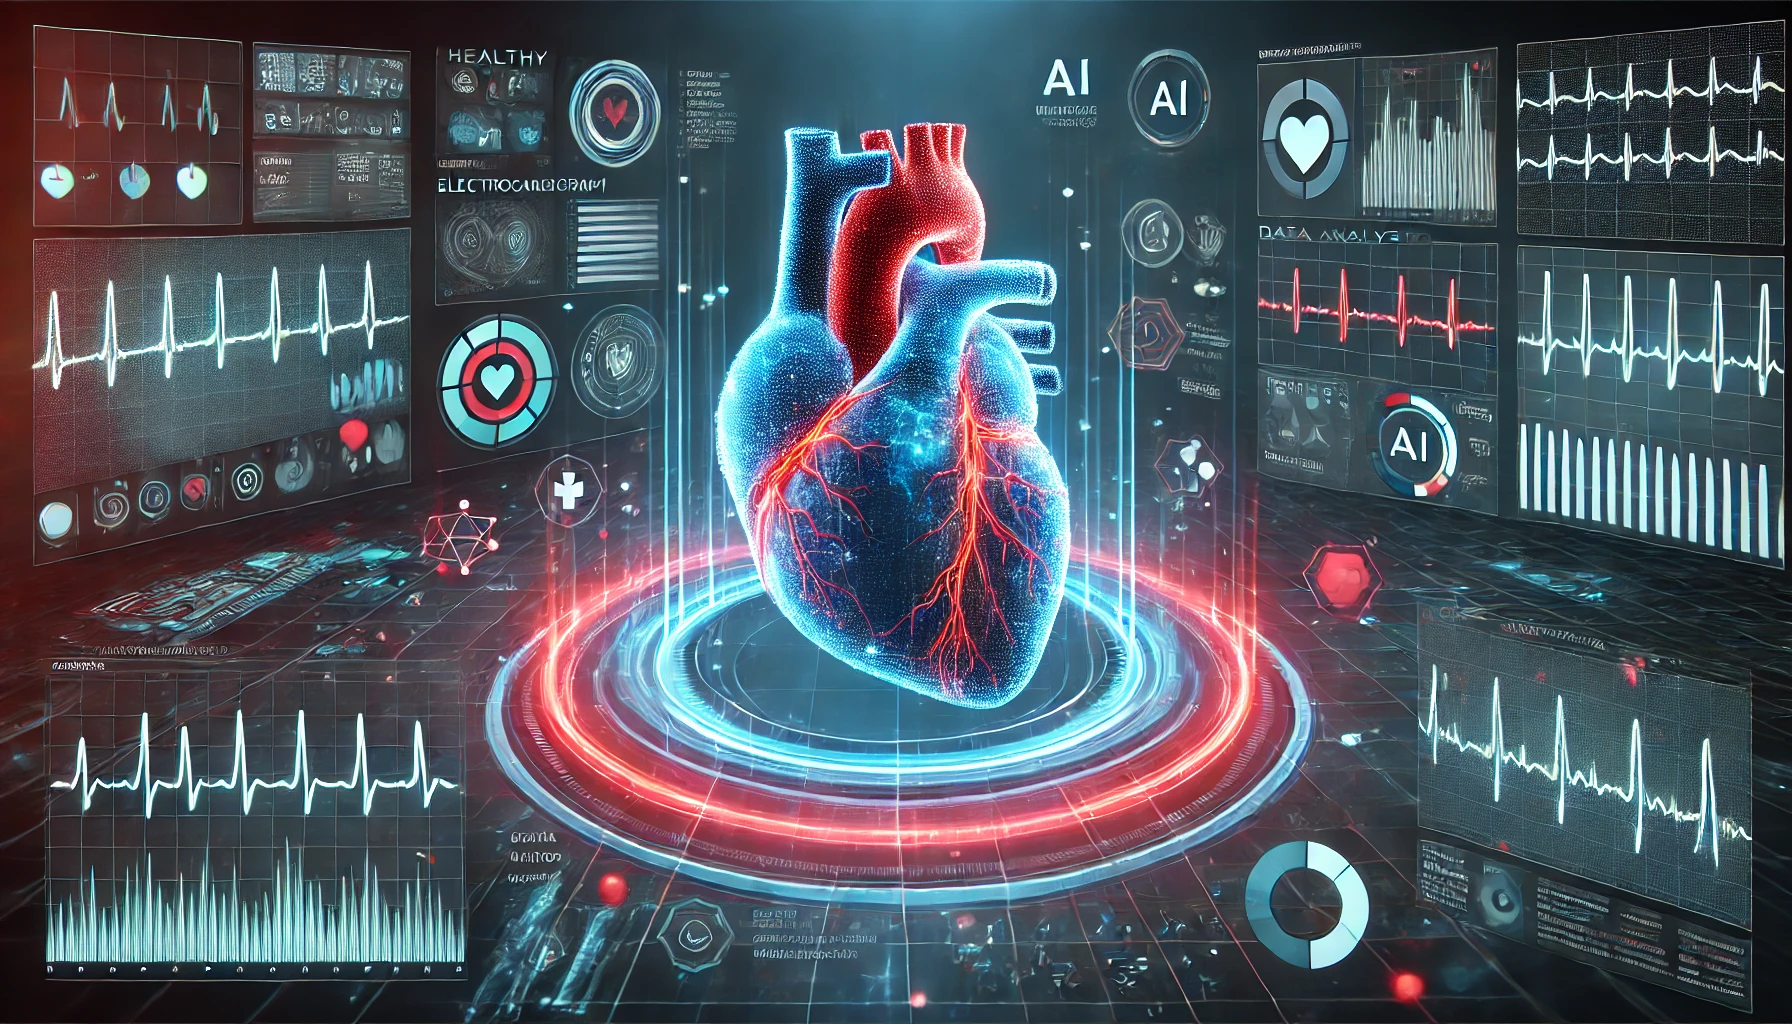

## Dataset Feature Explanations

* **Age** : The individual's age.

* **Gender** : The individual's gender (Male or Female).

* **Blood Pressure** : The individual's blood pressure (systolic).

* **Cholesterol Level**: The individual's total cholesterol level.

* **Exercise Habits** : The individual's exercise habits (Low, Medium, High).

* **Smoking** : Whether the individual smokes or not (Yes or No).

* **Family Heart Disease**: Whether there is a family history of heart disease (Yes or No).

* **Diabetes** : Whether the individual has diabetes (Yes or No).

* **BMI** : The individual's body mass index.

* **High Blood Pressure** : Whether the individual has high blood pressure (Yes or No).

* **Low HDL Cholesterol** : Whether the individual has low HDL cholesterol (Yes or No).

* **High LDL Cholesterol** : Whether the individual has high LDL cholesterol (Yes or No).

* **Alcohol Consumption** : The individual's alcohol consumption level (None, Low, Medium, High).

* **Stress Level** : The individual's stress level (Low, Medium, High).

* **Sleep Hours** : The number of hours the individual sleeps.

* **Sugar Consumption** : The individual's sugar consumption level (Low, Medium, High).

* **Triglyceride Level** : The individual's triglyceride level.

* **Fasting Blood Sugar** : The individual's fasting blood sugar level.

* **CRP Level** : The C-reactive protein level (a marker of inflammation).

* **Homocysteine Level** : The individual's homocysteine level (an amino acid that affects blood vessel health).

* **Heart Disease Status** : The individual's heart disease status (Yes or No).

## Analyze Content

1. [Dataset Feature Explanations](#Dataset-Feature-Explanations)
2. [Python Libraries](#Python-Libraries)
3. [Data Importing and First Overview](#Data-Importing-and-First-Overview)
   - [The differance between classes](#The-differance-between-classes)
4. [Outlier Dedection and Missing Data](#Outlier-Dedection-and-Missing-Data)

5. [Exploratory Data Analysis](#Exploratory-Data-Analysis)  
   - [The Analysis of Categorical Variables](#The-Analysis-of-Categorical-Variables)  
     - [Which Categorical Variables are Imbalance?](#Which-Categorical-Variables-are-Imbalance-?)  
     - [Does smoking affect the risk of heart disease?](#Does-smoking-affect-the-risk-of-heart-disease?)  
     - [Does exercise level influence heart disease?](#Does-exercise-level-influence-heart-disease?)  
     - [Are individuals with a family history of heart disease at higher risk?](#Are-individuals-with-a-family-history-of-heart-disease-at-higher-risk?)  
     - [Are individuals with high stress levels more prone to heart disease?](#Are-individuals-with-high-stress-levels-more-prone-to-heart-disease?)  
     - [How do stress levels and smoking habits together influence heart disease risk?](#How-do-stress-levels-and-smoking-habits-together-influence-heart-disease-risk?)  

   - [The Analysis of Numerical Variables](#The-Analysis-of-Numerical-Variables)  
     - [Do individuals with and without heart disease have different average ages?](#Do-individuals-with-and-without-heart-disease-have-different-average-ages?)  
     - [Does blood pressure affect heart disease?](#Does-blood-pressure-affect-heart-disease?)  
     - [What is the relationship between cholesterol level and heart disease?](#What-is-the-relationship-between-cholesterol-level-and-heart-disease?)  
     - [Does a higher BMI increase the risk of heart disease?](#Does-a-higher-BMI-increase-the-risk-of-heart-disease?)  
     - [Is there a relationship between triglyceride levels and the risk of heart disease?](#Is-there-a-relationship-between-triglyceride-levels-and-the-risk-of-heart-disease?)  
     - [Are individuals with higher fasting blood sugar levels at greater risk of heart disease?](#Are-individuals-with-higher-fasting-blood-sugar-levels-at-greater-risk-of-heart-disease?)  
     - [Are individuals with higher CRP levels more prone to heart disease?](#Are-individuals-with-higher-CRP-levels-more-prone-to-heart-disease?)  
     - [Does homocysteine level affect heart disease?](#Does-homocysteine-level-affect-heart-disease?)
     - [Does age affect heart disease?](#Does-age-affect-heart-disease?)
6. [Correlation Analysis](#Correlation-Analysis)
7. [Train Test Split](#Train-Test-Split)
8. [Feature Engineering](#Feature-Engineering)
   - [Feature Scaling](#Feature-Scaling)
   - [Feature Encoding](#Feature-Encoding)
   - [Missing Data](#Missing-Data)
9. [Machine Learning](#Machine-Learning)
    - [Naive Bayes](#Naive-Bayes)
        - [Model Introduction N](#Model-Introduction-N)
        - [Model Setup-N](#Model-Setup-N)
        - [Performance Metrics N](#Performance-Metrics-N)
        - [ROC Curve and Confusion Matrix N](#ROC-Curve-and-Confusion-Matrix-N)
        - [Comments and Conclusion N](#Comments-and-Conclusion-N)
    - [SVC](#SVC)
        - [Model Introduction S](#Model-Introduction-S)
        - [Model Setup S](#Model-Setup-S)
        - [Performance Metrics S](#Performance-Metrics-S)
        - [ROC Curve and Confusion Matrix S](#ROC-Curve-and-Confusion-Matrix-S)
        - [Comments and Conclusion S](#Comments-and-Conclusion-S)
    - [XGBoost](#XGBoost)
        - [Model Introduction X](#Model-Introduction-X)
        - [Model Setup X](#Model-Setup-X)
        - [Performance Metrics X](#Performance-Metrics-X)
        - [ROC Curve and Confusion Matrix X](#ROC-Curve-and-Confusion-Matrix-X)
        - [Comments and Conclusion X](#Comments-and-Conclusion-X)
10. [Final Evaluation and Project Summary](#Final-Evaluation-and-Project-Summary)


In [1]:
pip install ycimpute

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install missingno

## Python Libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns # Data visualization 
import matplotlib.pyplot as plt # Data visualization 
import scipy.stats as stats

from ycimpute.imputer import knnimput
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score ,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter

from warnings import filterwarnings
filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease/heart_disease.csv


## Data Importing and First Overview

In [4]:
heart_diases = pd.read_csv("/kaggle/input/heart-disease/heart_disease.csv")
df = heart_diases.copy()
# The reason we make a copy of our dataset is that if we make changes to it , the orginal dataset will not be corrupted.

In [5]:
df.head(5)

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [6]:
df.dtypes

Age                     float64
Gender                   object
Blood Pressure          float64
Cholesterol Level       float64
Exercise Habits          object
Smoking                  object
Family Heart Disease     object
Diabetes                 object
BMI                     float64
High Blood Pressure      object
Low HDL Cholesterol      object
High LDL Cholesterol     object
Alcohol Consumption      object
Stress Level             object
Sleep Hours             float64
Sugar Consumption        object
Triglyceride Level      float64
Fasting Blood Sugar     float64
CRP Level               float64
Homocysteine Level      float64
Heart Disease Status     object
dtype: object

In [7]:
df.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

In [8]:
df.iloc[:5,10:11] # invisible column

,Low HDL Cholesterol
0,Yes
1,Yes
2,Yes
3,No
4,No


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,9971.0,49.296259,18.193970,18.000000,34.000000,49.000000,65.000000,80.000000
Blood Pressure,9981.0,149.757740,17.572969,120.000000,134.000000,150.000000,165.000000,180.000000
Cholesterol Level,9970.0,225.425577,43.575809,150.000000,187.000000,226.000000,263.000000,300.000000
BMI,9978.0,29.077269,6.307098,18.002837,23.658075,29.079492,34.520015,39.996954
Sleep Hours,9975.0,6.991329,1.753195,4.000605,5.449866,7.003252,8.531577,9.999952
Triglyceride Level,9974.0,250.734409,87.067226,100.000000,176.000000,250.000000,326.000000,400.000000
Fasting Blood Sugar,9978.0,120.142213,23.584011,80.000000,99.000000,120.000000,141.000000,160.000000
CRP Level,9974.0,7.472201,4.340248,0.003647,3.674126,7.472164,11.255592,14.997087
Homocysteine Level,9980.0,12.456271,4.323426,5.000236,8.723334,12.409395,16.140564,19.999037


In [10]:
df.shape # 10000 rows and 21 columns

(10000, 21)

### The differance between classes 

In [11]:
df["Gender"].value_counts()

Gender
Male      5003
Female    4978
Name: count, dtype: int64

In [12]:
df["Smoking"].value_counts()

Smoking
Yes    5123
No     4852
Name: count, dtype: int64

In [13]:
df["Family Heart Disease"].value_counts()

Family Heart Disease
No     5004
Yes    4975
Name: count, dtype: int64

In [14]:
df["Stress Level"].value_counts()

Stress Level
Medium    3387
Low       3320
High      3271
Name: count, dtype: int64

## Outlier Dedection and Missing Data

In [15]:
df.isnull().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

In [16]:
df.isnull().sum()/len(df) * 100

Age                      0.29
Gender                   0.19
Blood Pressure           0.19
Cholesterol Level        0.30
Exercise Habits          0.25
Smoking                  0.25
Family Heart Disease     0.21
Diabetes                 0.30
BMI                      0.22
High Blood Pressure      0.26
Low HDL Cholesterol      0.25
High LDL Cholesterol     0.26
Alcohol Consumption     25.86
Stress Level             0.22
Sleep Hours              0.25
Sugar Consumption        0.30
Triglyceride Level       0.26
Fasting Blood Sugar      0.22
CRP Level                0.26
Homocysteine Level       0.20
Heart Disease Status     0.00
dtype: float64

In [17]:
# Total Mising Data 
df.isnull().sum().sum()

3054

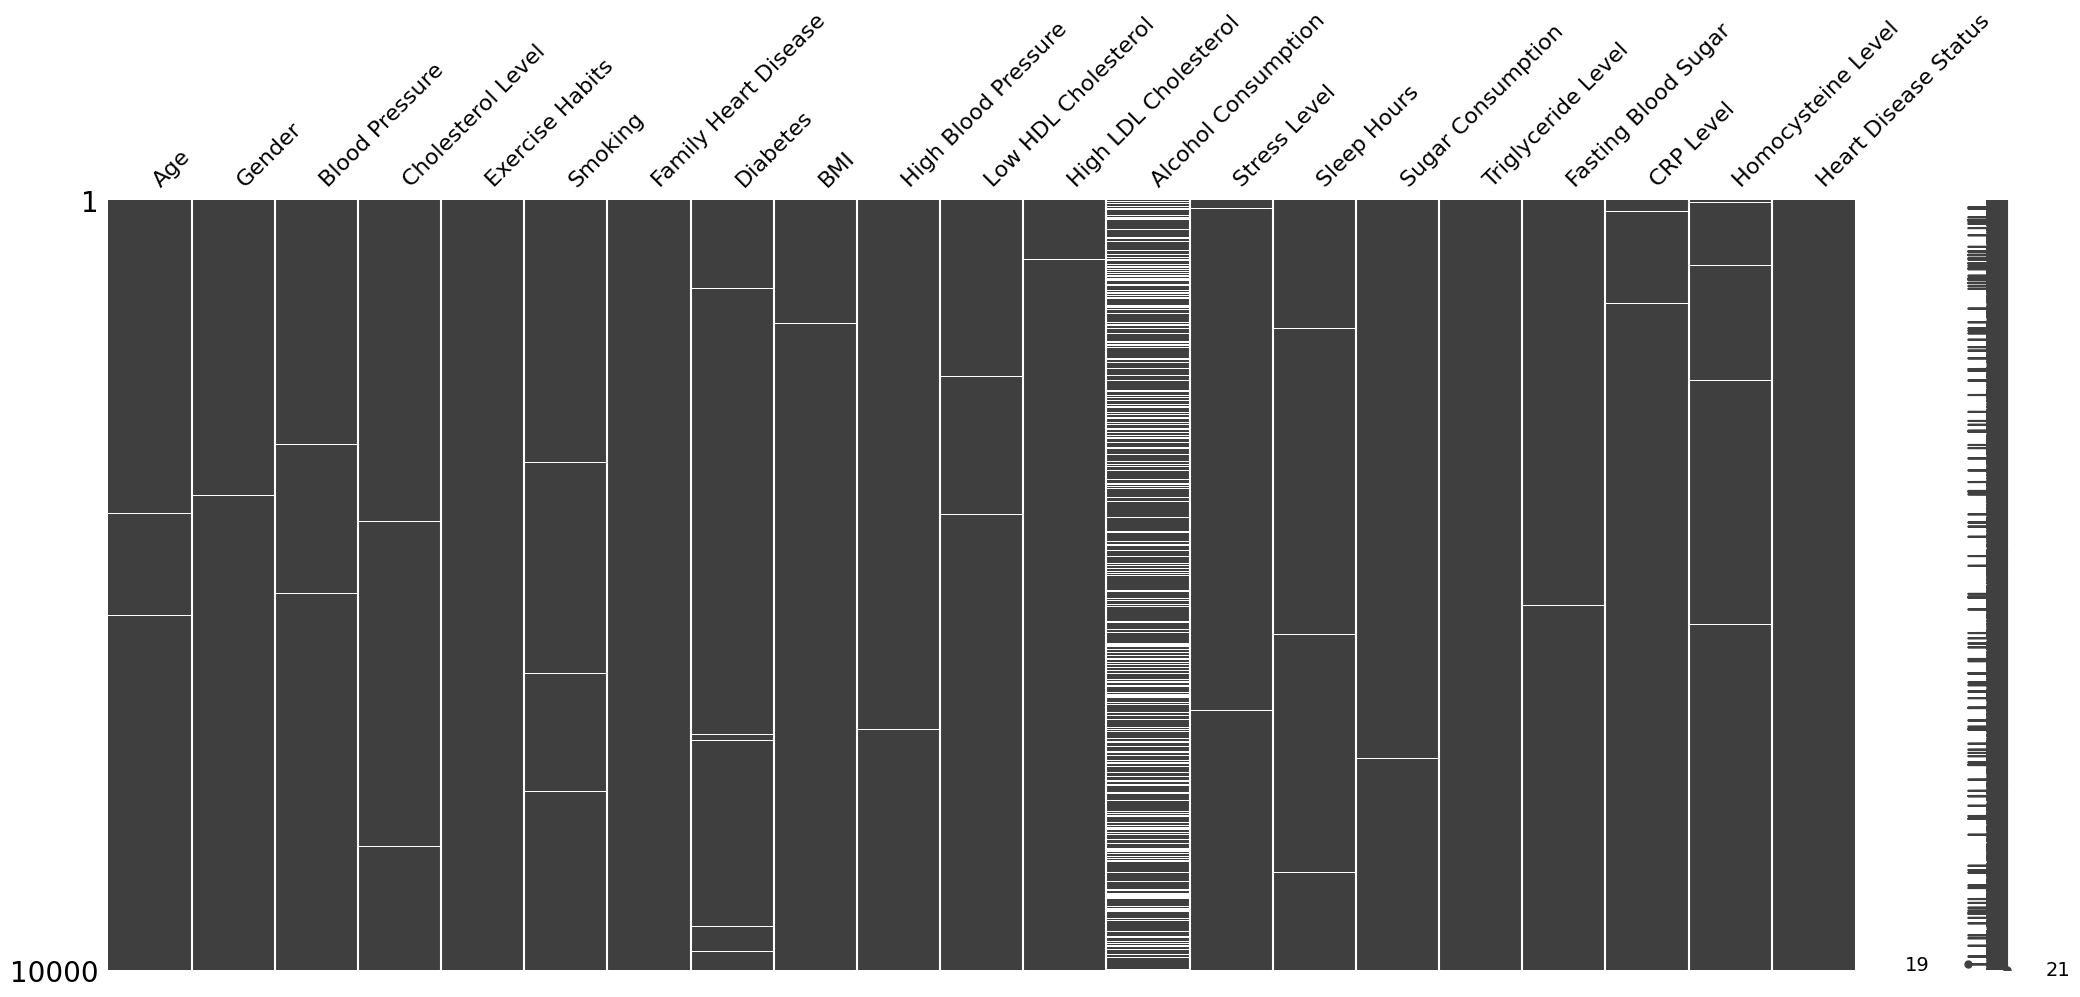

In [18]:
msno.matrix(df);

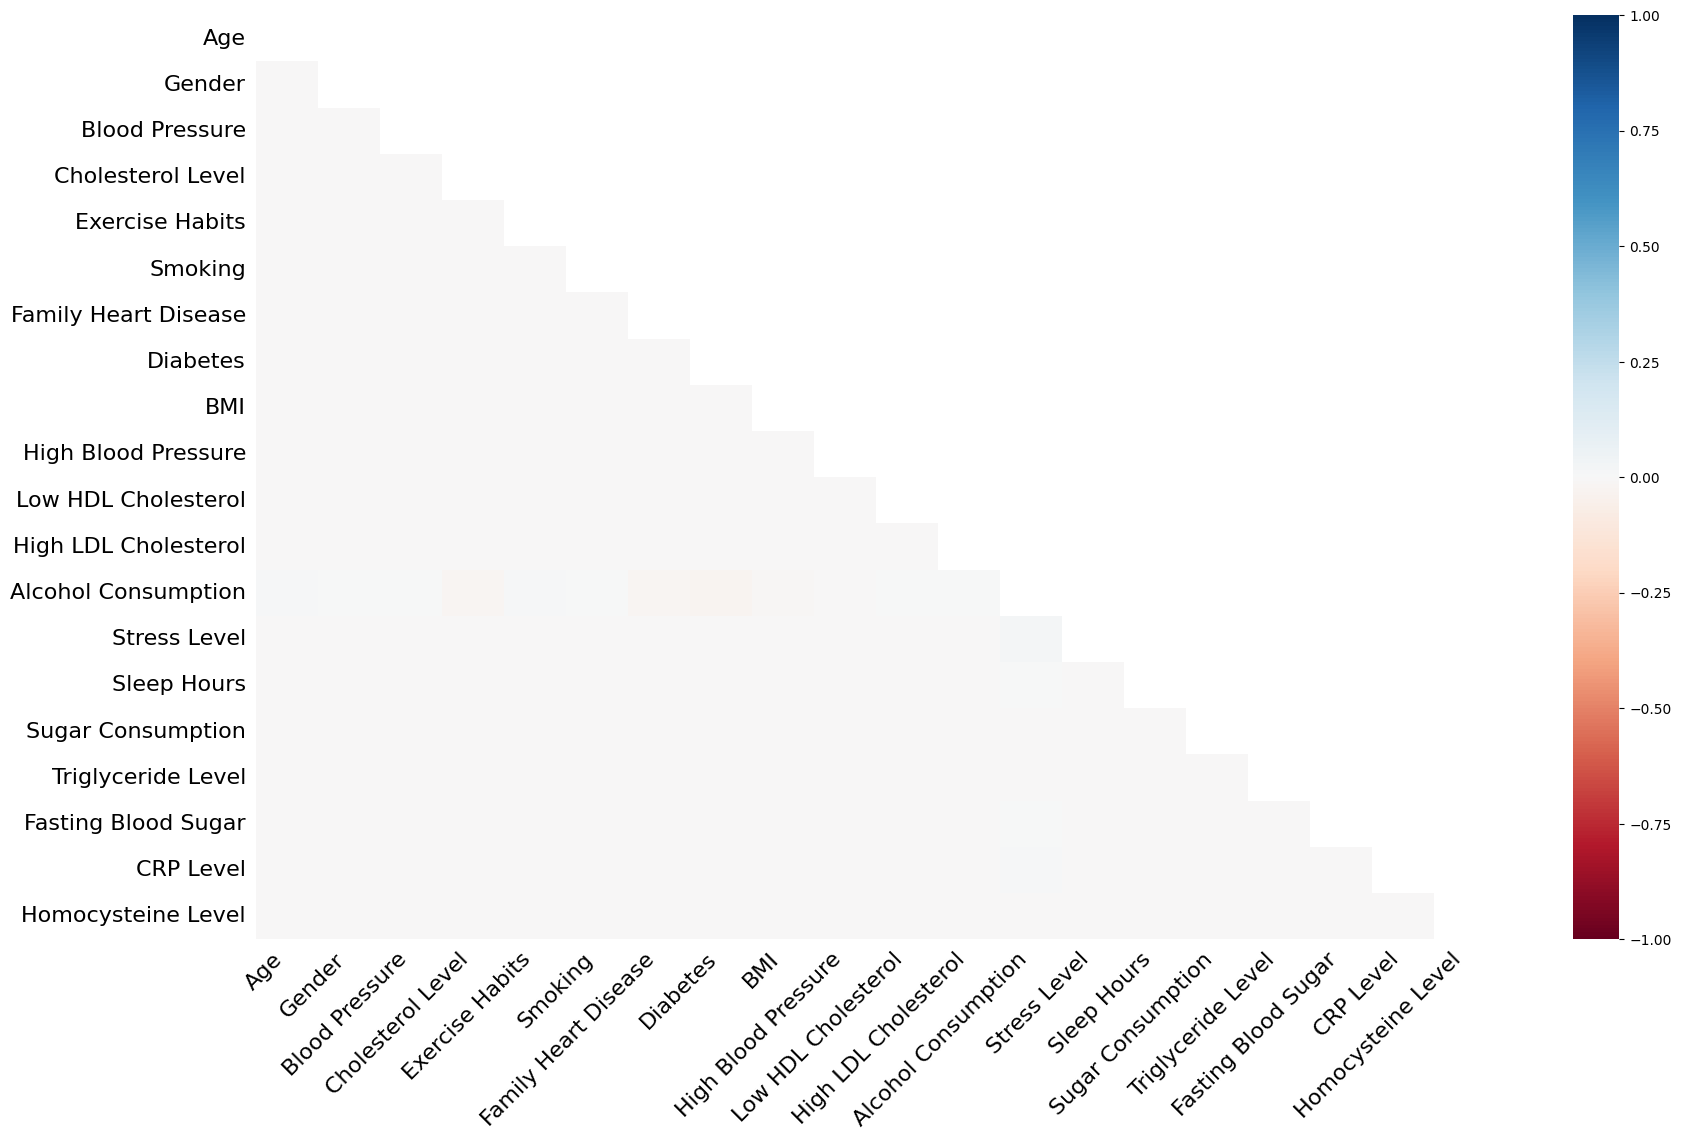

In [19]:
msno.heatmap(df);

* Missing it is obvserved that there is no relationship between the data

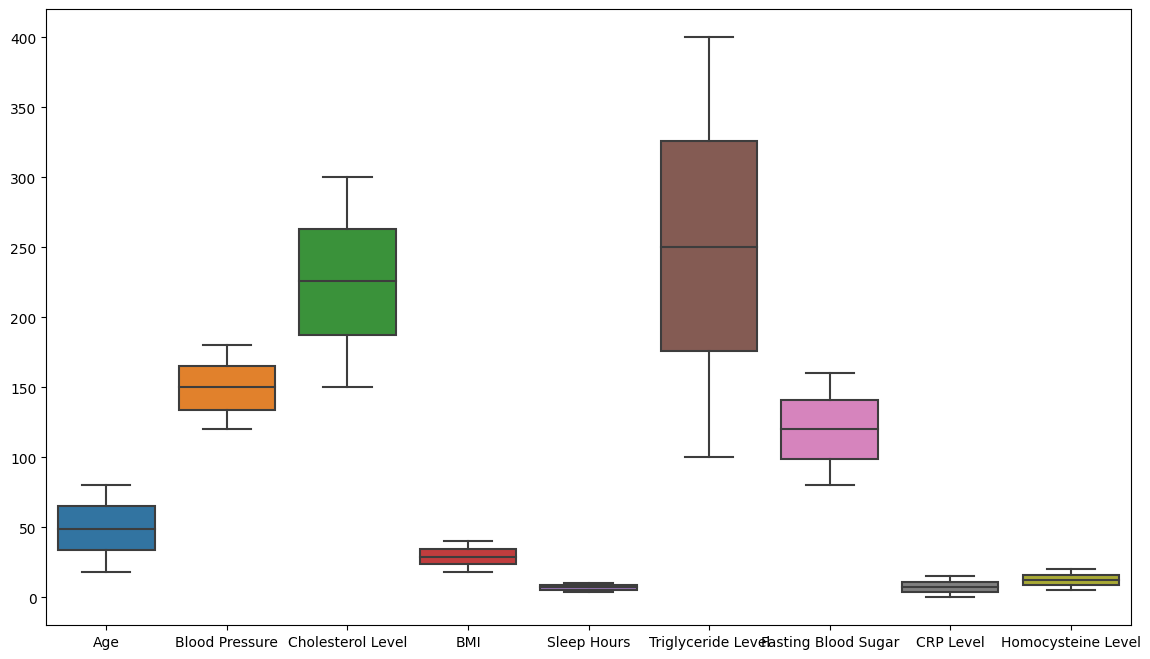

In [20]:
plt.figure(figsize=(14,8))
sns.boxplot(df)
plt.show()

* There are no outlier dedections  

## Exploratory Data Analysis

In [21]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


### The Analysis of Categorical Variables 

#### Which Categorical Variables are Imbalance ? 

In [22]:
cat_df = df.select_dtypes(include = ["object"])
cat_df.nunique()

Gender                  2
Exercise Habits         3
Smoking                 2
Family Heart Disease    2
Diabetes                2
High Blood Pressure     2
Low HDL Cholesterol     2
High LDL Cholesterol    2
Alcohol Consumption     3
Stress Level            3
Sugar Consumption       3
Heart Disease Status    2
dtype: int64

In [23]:
for col in cat_df.columns:
    print(f"Column : {col}")
    print(cat_df[col].value_counts(),end = "\n\n")

Column : Gender
Gender
Male      5003
Female    4978
Name: count, dtype: int64

Column : Exercise Habits
Exercise Habits
High      3372
Medium    3332
Low       3271
Name: count, dtype: int64

Column : Smoking
Smoking
Yes    5123
No     4852
Name: count, dtype: int64

Column : Family Heart Disease
Family Heart Disease
No     5004
Yes    4975
Name: count, dtype: int64

Column : Diabetes
Diabetes
No     5018
Yes    4952
Name: count, dtype: int64

Column : High Blood Pressure
High Blood Pressure
Yes    5022
No     4952
Name: count, dtype: int64

Column : Low HDL Cholesterol
Low HDL Cholesterol
Yes    5000
No     4975
Name: count, dtype: int64

Column : High LDL Cholesterol
High LDL Cholesterol
No     5036
Yes    4938
Name: count, dtype: int64

Column : Alcohol Consumption
Alcohol Consumption
Medium    2500
Low       2488
High      2426
Name: count, dtype: int64

Column : Stress Level
Stress Level
Medium    3387
Low       3320
High      3271
Name: count, dtype: int64

Column : Sugar Consum

Data Set General Evaluation
* In our dataset distribution of indepented values balance however target value = "Heart Disease Status" is imbalance this rate is %20 - %80" <br>

Considerations for the Modeling Phase:
* Imbalanced datasets can cause the model to favor the majority class ("No"), making it more difficult to correctly predict the minority class ("Yes").
* To address this imbalance, the following techniques can be considered:
* SMOTE (Synthetic Minority Over-sampling Technique) to increase the minority class
* Class Weight adjustment to give more importance to the minority class
* Evaluation using F1-Score, Precision-Recall metrics instead of relying only on accuracy <br>


Conclusion:
The imbalance detected during the EDA phase should be carefully handled in the modeling stage. Appropriate balancing techniques should be used to avoid misleading results

#### Does smoking affect the risk of heart disease?

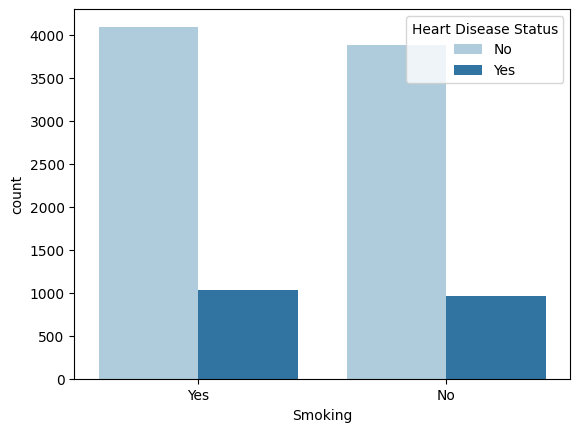

In [24]:
sns.countplot(data = df , x = "Smoking",hue = "Heart Disease Status",palette ="Paired")
plt.show()

In [25]:
df.groupby("Smoking")["Heart Disease Status"].value_counts(normalize=True)

Smoking  Heart Disease Status
No       No                      0.801113
         Yes                     0.198887
Yes      No                      0.799141
         Yes                     0.200859
Name: proportion, dtype: float64

In [26]:
smoking_heart_disease = df.groupby("Smoking")["Heart Disease Status"].value_counts(normalize=True)

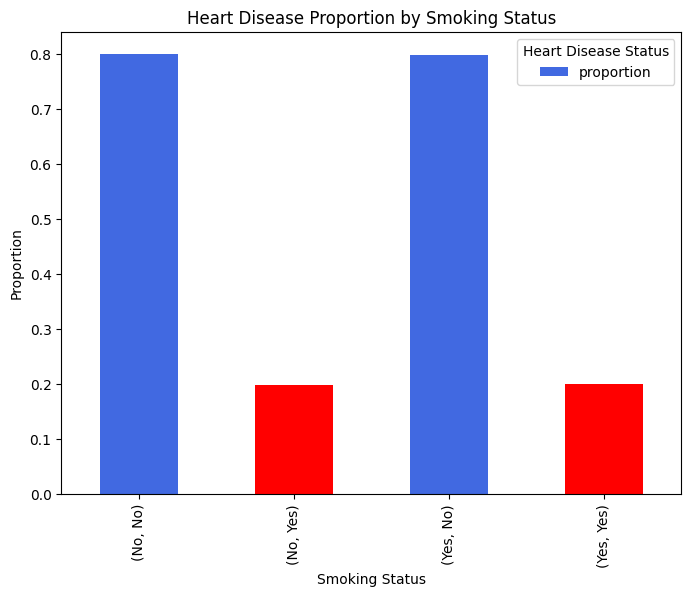

In [27]:
smoking_heart_disease.plot(kind = "bar",stacked=False, figsize=(8,6), color=["royalblue", "red"])
plt.title("Heart Disease Proportion by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Proportion")
plt.legend(title="Heart Disease Status")
plt.show()

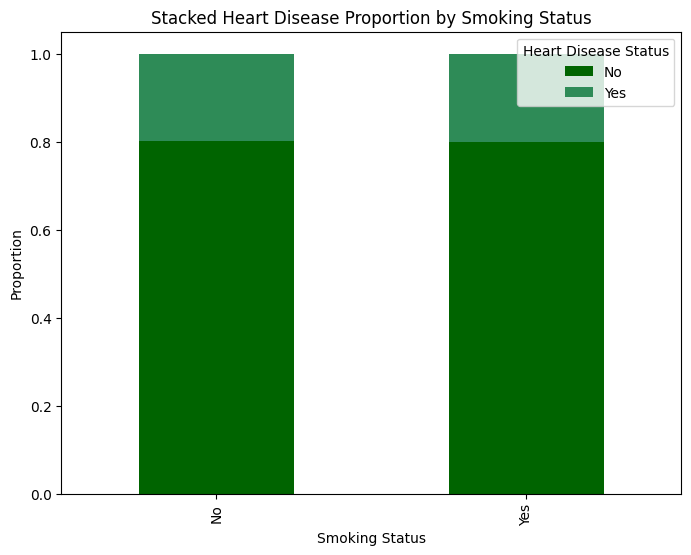

In [28]:
smoking_heart_disease = df.groupby("Smoking")["Heart Disease Status"].value_counts(normalize=True).unstack()

smoking_heart_disease.plot(kind="bar", stacked=True, figsize=(8,6), color=["darkgreen","seagreen"])

plt.title("Stacked Heart Disease Proportion by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Proportion")
plt.legend(title="Heart Disease Status")
plt.show()


* The countplot shows that the proportion of heart disease among smokers and non-smokers is nearly the same.
* The grouped bar plot and stacked bar plot confirm that the difference between smokers and non-smokers in terms of heart disease is minimal.
* According to the normalized proportions, about 20% of both smokers and non-smokers have heart disease, while 80% do not.
* This suggests that smoking alone may not be a strong predictor of heart disease in this dataset.

####  Does exercise level influence heart disease?

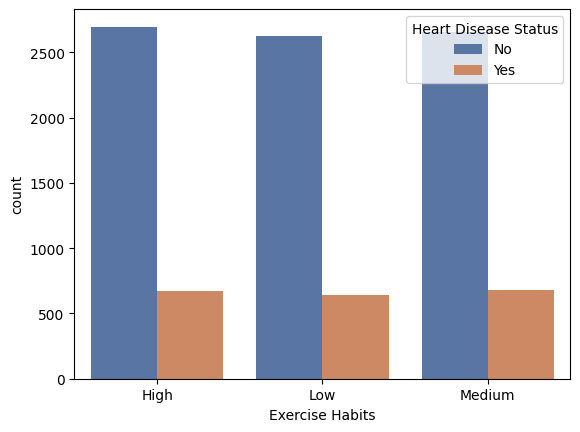

In [29]:
sns.countplot(data = df,x = "Exercise Habits",hue = "Heart Disease Status",palette = "deep")
plt.show()

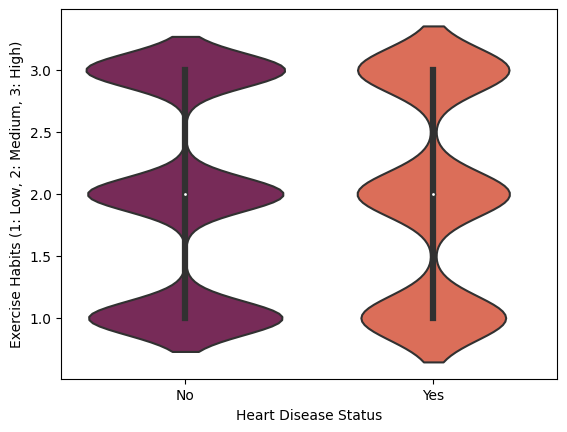

In [30]:
exercise_mapping = {"Low": 1, "Medium": 2, "High": 3}
df["Exercise Habits Numeric"] = df["Exercise Habits"].map(exercise_mapping)

sns.violinplot(data=df, x="Heart Disease Status", y="Exercise Habits Numeric",palette = "rocket")

plt.xticks([0, 1], ["No", "Yes"])  
plt.ylabel("Exercise Habits (1: Low, 2: Medium, 3: High)")
plt.show()


* The countplot shows that the proportion of heart disease cases is fairly similar across all exercise levels (High, Medium, and Low).
* There doesn’t seem to be a clear trend suggesting that individuals who exercise more have a significantly lower risk of heart disease.
* The proportion of heart disease cases remains almost constant across different exercise levels, indicating that exercise habits alone may not be a strong predictor of heart disease in this dataset.

#### Are individuals with a family history of heart disease at higher risk?

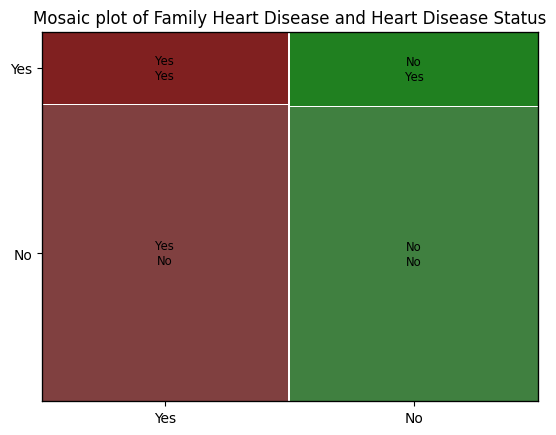

In [31]:
mosaic(data = df, index = ["Family Heart Disease","Heart Disease Status"])
plt.title("Mosaic plot of Family Heart Disease and Heart Disease Status")
plt.show()

* The mosaic plot shows that the proportion of heart disease cases among individuals with and without a family history of heart disease is almost equal.
* There is no significant difference in the proportion of heart disease between the two groups, suggesting that having a family history may not be a strong predictor of heart disease in this dataset.
* If a family history of heart disease were a major factor, we would expect a much larger proportion of "Yes" cases in the "Family History = Yes" category.

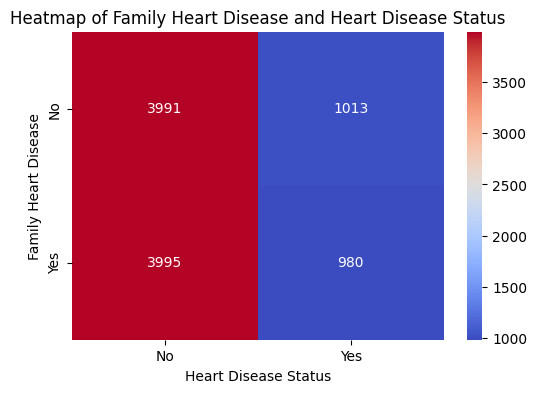

In [32]:
family_heart_disease_heatmap = pd.crosstab(df["Family Heart Disease"], df["Heart Disease Status"])
plt.figure(figsize=(6,4))
sns.heatmap(family_heart_disease_heatmap, annot=True, cmap="coolwarm", fmt="d")
plt.title("Heatmap of Family Heart Disease and Heart Disease Status")
plt.xlabel("Heart Disease Status")
plt.ylabel("Family Heart Disease")
plt.show()


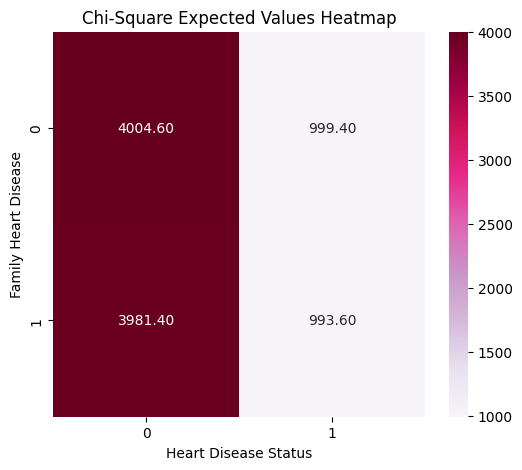

Chi-Square Test p-value: 0.5116692335334628


In [33]:
chi2_table = pd.crosstab(df["Family Heart Disease"], df["Heart Disease Status"])
chi2_stat, p, dof, expected = stats.chi2_contingency(chi2_table)

plt.figure(figsize=(6,5))
sns.heatmap(expected, annot=True, cmap="PuRd", fmt=".2f")
plt.title("Chi-Square Expected Values Heatmap")
plt.xlabel("Heart Disease Status")
plt.ylabel("Family Heart Disease")
plt.show()

print(f"Chi-Square Test p-value: {p}")


* The first heatmap (observed values) shows the actual counts of heart disease cases for individuals with and without a family history of heart disease.
* The second heatmap (expected values from the Chi-Square test) shows that the expected counts are very close to the observed counts, indicating no significant deviation.
* Chi-Square test result: p-value = 0.511

Since p-value > 0.05, we fail to reject the null hypothesis, meaning there is no significant association between family history of heart disease and having heart disease in this dataset.
* Conclusion: Having a family history of heart disease does not seem to be a strong predictor of heart disease in this dataset.

#### Are individuals with high stress levels more prone to heart disease?

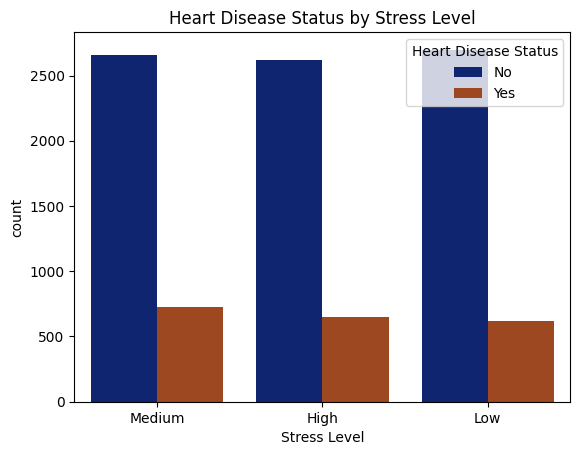

In [34]:
sns.countplot(data = df, x = "Stress Level",hue = "Heart Disease Status",palette = "dark")
plt.title("Heart Disease Status by Stress Level")
plt.show()

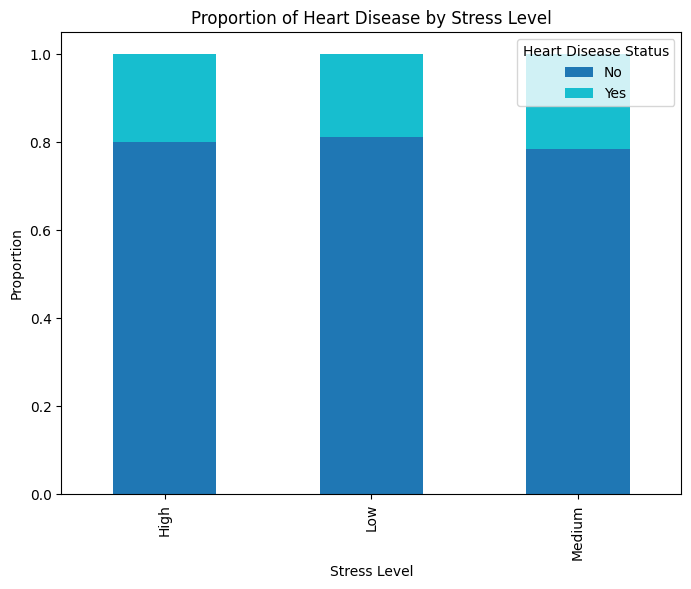

In [35]:
stress_heart_disease = pd.crosstab(df["Stress Level"], df["Heart Disease Status"], normalize="index")

stress_heart_disease.plot(kind="bar", stacked=True, figsize=(8,6), colormap="tab10")
plt.title("Proportion of Heart Disease by Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Proportion")
plt.legend(title="Heart Disease Status")
plt.show()

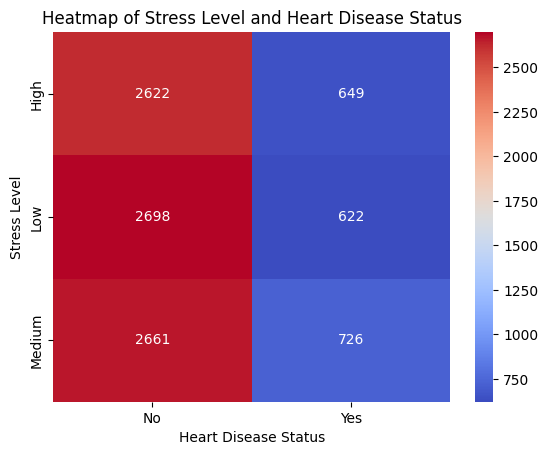

In [36]:
stress_level_heatmap = pd.crosstab(df["Stress Level"], df["Heart Disease Status"])
sns.heatmap(stress_level_heatmap, annot=True, cmap="coolwarm", fmt="d")
plt.title("Heatmap of Stress Level and Heart Disease Status")
plt.xlabel("Heart Disease Status")
plt.ylabel("Stress Level")
plt.show()

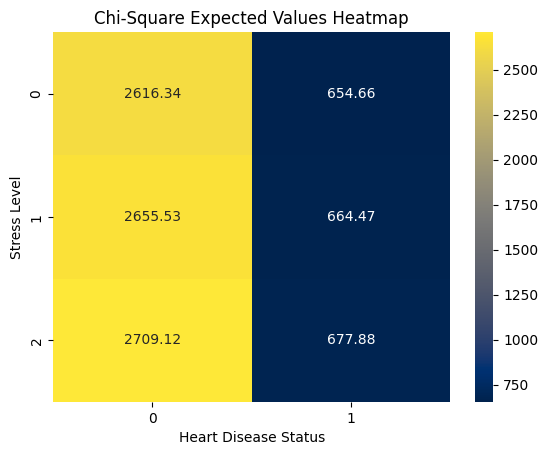

Chi-Square Test p-value: 0.021008453758264992


In [37]:
chi2_table = pd.crosstab(df["Stress Level"], df["Heart Disease Status"])
chi2_stat, p, dof, expected = stats.chi2_contingency(chi2_table)

sns.heatmap(expected, annot=True, cmap="cividis", fmt=".2f")
plt.title("Chi-Square Expected Values Heatmap")
plt.xlabel("Heart Disease Status")
plt.ylabel("Stress Level")
plt.show()

print(f"Chi-Square Test p-value: {p}")

##### **Key Observations**:
* A Chi-Square test was conducted to determine whether stress level and heart disease status are statistically related.
* The p-value was found to be less than 0.05, indicating a significant relationship between stress level and heart disease.<br>
##### **Graphical Insights**:
* The stacked bar plot shows that individuals with medium stress levels have a slightly higher proportion of heart disease compared to those with low or high stress levels.
* The heatmap of expected vs. actual values confirms that the observed distribution aligns with the statistical test results. <br>
##### **Conclusion** :
* Stress level is a significant factor in heart disease risk based on statistical tests and visualizations.
* Individuals with medium stress levels appear to be more prone to heart disease than those with high or low stress levels.


#### How do stress levels and smoking habits together influence heart disease risk?

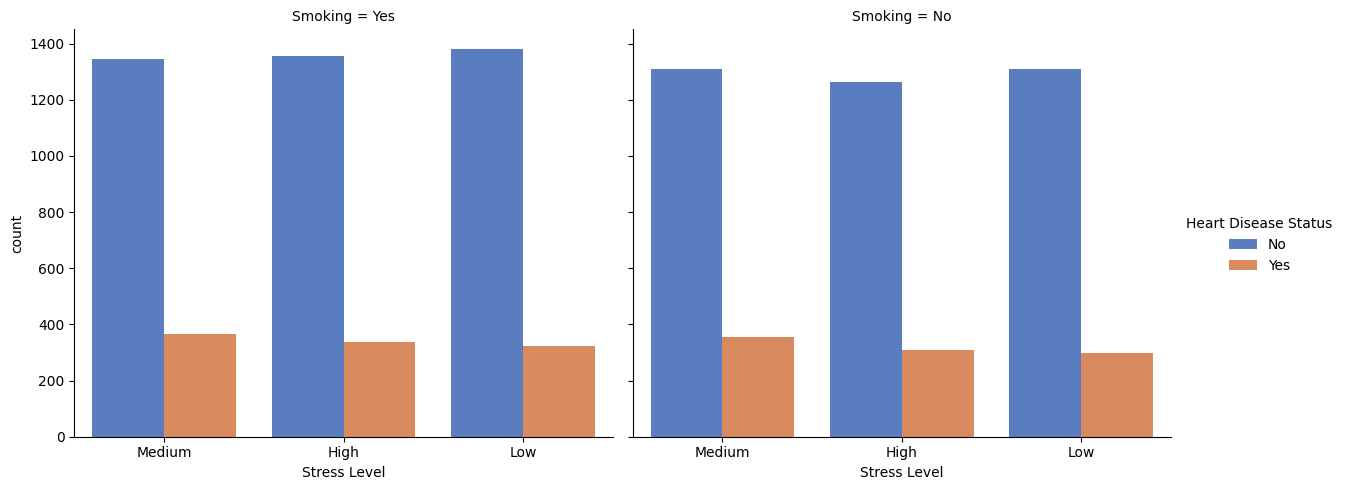

In [38]:
sns.catplot(data=df, x="Stress Level", hue="Heart Disease Status", 
            col="Smoking", kind="count", height=5, aspect=1.2,palette = "muted")

plt.show()


In [39]:
chi2_table = pd.crosstab(df["Stress Level"], df["Smoking"])
chi2_stat, p, dof, expected = stats.chi2_contingency(chi2_table)
print(f"Chi-Square Test p-value: {p}")

Chi-Square Test p-value: 0.6251935113789563


In [40]:
chi2_table = pd.crosstab(df["Stress Level"], df["Heart Disease Status"])
chi2_stat, p, dof, expected = stats.chi2_contingency(chi2_table)
print(f"Chi-Square Test p-value: {p}")

Chi-Square Test p-value: 0.021008453758264992


In [41]:
chi2_table = pd.crosstab(df["Smoking"], df["Heart Disease Status"])
chi2_stat, p, dof, expected = stats.chi2_contingency(chi2_table)
print(f"Chi-Square Test p-value: {p}")

Chi-Square Test p-value: 0.8250311387918522


**Key Findings**

1. Smoking does not have a statistically significant relationship with either heart disease or stress level.

* p-value (Smoking & Heart Disease): 0.825 (> 0.05)
* p-value (Smoking & Stress Level): 0.625 (> 0.05)
* This suggests that smoking alone does not directly influence heart disease risk in this dataset.

2. Stress level has a statistically significant relationship with heart disease.
* p-value (Stress Level & Heart Disease): 0.021 (< 0.05)
* This means that stress level is an important factor affecting heart disease risk.

3. Medium stress levels show a higher likelihood of heart disease compared to high and low stress levels.
* This is not a result of random variation but an actual statistically significant pattern.
* The assumption that “medium stress levels being associated with more heart disease cases is just by chance” is rejected.

4. Smoking does not act as a confounding factor in this relationship.
* Since smoking is not significantly associated with either stress level or heart disease, it does not influence the observed stress-heart disease relationship. <br>

**Conclusion**
* Stress level is an important factor in heart disease risk, particularly for individuals with medium stress levels.
* Smoking does not appear to be a key determinant of heart disease in this dataset.


### The Analysis of Numerical Variables

#### Do individuals with and without heart disease have different average ages?

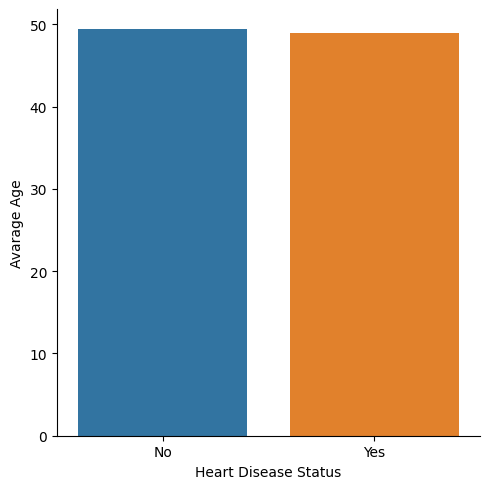

In [42]:
heart_group_age_mean = df.groupby("Heart Disease Status")["Age"].mean().reset_index()
sns.catplot(data= heart_group_age_mean, x= "Heart Disease Status",y = "Age",kind = "bar")
plt.ylabel("Avarage Age")
plt.show()

In [43]:
grouped= df.groupby("Heart Disease Status")["Age"]
heart_disease_yes = grouped.get_group("Yes")
heart_disease_no = grouped.get_group("No")

In [44]:
heart_disease_no_sampled = heart_disease_no.sample(n=len(heart_disease_yes), random_state=42)
yes_no = pd.DataFrame({
    "Yes": heart_disease_yes.values, 
    "No": heart_disease_no_sampled.values
})
yes_no = yes_no.dropna()

In [45]:
statistic , pvalue = stats.shapiro(yes_no.Yes)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue) )

statistic = 0.9529, p-value = 0.0000


In [46]:
statistic , pvalue = stats.shapiro(yes_no.No)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue))

statistic = 0.9536, p-value = 0.0000


In [47]:
test_statistic, pvalue = stats.ttest_ind(yes_no["Yes"], yes_no["No"], equal_var=True)
print('Test Statistic = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Test Statistic = -1.5220, p-value = 0.1281


**Objective**:
* To determine whether there is a significant difference in the average age between individuals with and without heart disease.<br>

**Methodology**:

1. Data Preparation:
* The dataset was grouped based on "Heart Disease Status."
* Since there was an imbalance (2000 individuals with heart disease vs. 8000 without), a downsampling technique was applied. We randomly selected 2000 observations from the "No Heart Disease" group to match the number of observations in the "Yes" group.
* Missing values were dropped to avoid errors in the statistical tests.
  
2. Normality Test:
* Shapiro-Wilk test was applied to both groups (Heart Disease = Yes and No) to check for normality.
* Results:
  - p-value for "Yes" group: < 0.05 (Data follows a normal distribution)
  - p-value for "No" group: < 0.05 (Data follows a normal distribution)
* Since both groups met the normality assumption, an independent t-test was chosen for further analysis.

3. Independent T-Test:
* Null Hypothesis (H₀): There is no significant difference in the average age between individuals with and without heart disease.
* Alternative Hypothesis (H₁): There is a significant difference in the average age between individuals with and without heart disease.
* Results:
    - Test Statistic: -1.5220
    - p-value: 0.1281
* Since the p-value is greater than 0.05, we fail to reject the null hypothesis. This means there is no statistically significant difference in the average age between individuals with and without heart disease.

**Conclusion** :
The results indicate that age alone is not a distinguishing factor between individuals with and without heart disease. This suggests that other variables, such as lifestyle factors, genetic predisposition, or medical history, might play a more crucial role in determining heart disease risk.


#### Does blood pressure affect heart disease?

In [48]:
grouped= df.groupby("Heart Disease Status")["Blood Pressure"]
heart_disease_yes = grouped.get_group("Yes")
heart_disease_no = grouped.get_group("No")

heart_disease_no_sampled = heart_disease_no.sample(n=len(heart_disease_yes), random_state=42)
yes_no = pd.DataFrame({
    "Yes": heart_disease_yes.values, 
    "No": heart_disease_no_sampled.values
})
yes_no = yes_no.dropna()

In [49]:
statistic , pvalue = stats.shapiro(yes_no.Yes)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue))

statistic , pvalue = stats.shapiro(yes_no.No)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue))

statistic = 0.9538, p-value = 0.0000
statistic = 0.9525, p-value = 0.0000


In [50]:
test_statistic, pvalue = stats.ttest_ind(yes_no["Yes"], yes_no["No"], equal_var=True)
print('Test Statistic = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Test Statistic = -1.3067, p-value = 0.1914


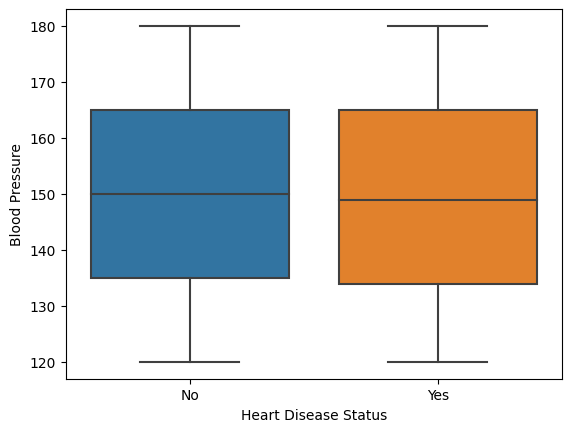

In [51]:
sns.boxplot(data = df, x= "Heart Disease Status",y="Blood Pressure")
plt.show()

**Exploratory Analysis**:

* A boxplot was created to visualize the distribution of blood pressure across individuals with and without heart disease.
* The boxplot suggests that there is no significant difference in blood pressure levels between the two groups. The median and interquartile ranges appear to be nearly identical.

**Statistical Analysis** :
* A random downsampling technique was used to ensure an equal number of observations for individuals with and without heart disease.
* A Shapiro-Wilk test was performed to check for normality, and since the p-value < 0.05, the data was found to be not normally distributed.
* Despite the non-normality, due to the Central Limit Theorem and a sufficient number of observations, we proceeded with an independent t-test.

**T-Test Results**:

* Test Statistic: -1.3067
* p-value: 0.1914
* Since the p-value > 0.05, we fail to reject the null hypothesis (H₀), meaning there is no statistically significant difference in blood pressure between individuals with and without heart disease.

**Conclusion**:
* The results from both exploratory visualization (boxplot) and statistical analysis (t-test) confirm that blood pressure levels are not significantly different between the two groups.
* While high blood pressure is a known risk factor for heart disease, in this dataset, there is no clear statistical evidence to suggest a significant relationship between blood pressure and heart disease.


#### What is the relationship between cholesterol level and heart disease?

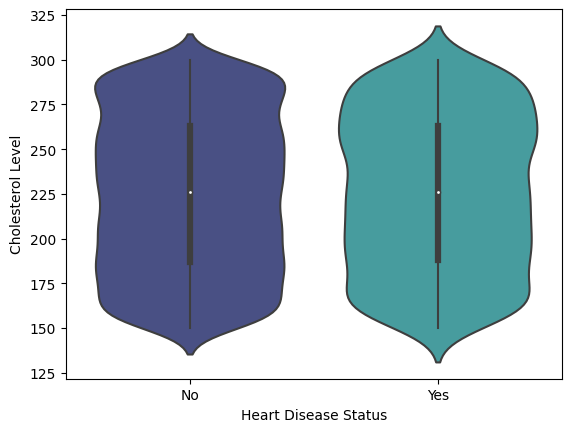

In [52]:
sns.violinplot(data = df, y = "Cholesterol Level",x = "Heart Disease Status",palette ="mako")
plt.show()

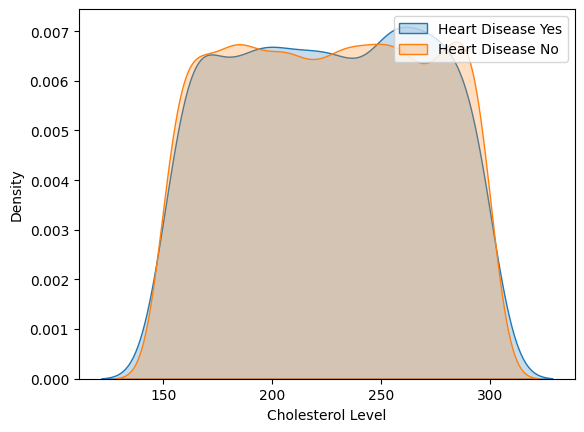

In [53]:
sns.kdeplot(df[df["Heart Disease Status"] == "Yes"]["Cholesterol Level"], label="Heart Disease Yes", shade=True)
sns.kdeplot(df[df["Heart Disease Status"] == "No"]["Cholesterol Level"], label="Heart Disease No", shade=True)
plt.legend()
plt.show()


In [54]:
df_copy = df.copy()
df_copy = df_copy.dropna()
df_copy["Heart Disease Status"] = df_copy["Heart Disease Status"].map({"No": 0, "Yes": 1})

In [55]:
test_statistic , pvalue = stats.pearsonr(df_copy["Cholesterol Level"],df_copy["Heart Disease Status"])
print('Corelation Coef = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Corelation Coef = 0.0087, p-value = 0.4671


**Analysis and Findings**
To examine whether cholesterol levels influence the likelihood of heart disease, multiple analyses were performed:

1. Violin Plot Analysis

* The violin plot shows the distribution of cholesterol levels for individuals with and without heart disease.
* The distributions appear to be similar, with no significant differences in spread or central tendency.

2. Kernel Density Estimation (KDE) Plot

* The KDE plot visualizes the density distribution of cholesterol levels for both groups.
* The distributions overlap almost entirely, further suggesting that cholesterol levels do not differ significantly between individuals with and without heart disease.

3. Pearson Correlation Test

* A Pearson correlation test was conducted between cholesterol levels and heart disease status.
* Correlation coefficient: -0.0005
* p-value: 0.9625
* The p-value is much greater than 0.05, indicating no statistically significant correlation between cholesterol levels and heart disease.

**Conclusion**
* Based on the visualizations and statistical analysis, no meaningful relationship was found between cholesterol levels and heart disease.
* This suggests that cholesterol level alone may not be a strong predictor of heart disease in this dataset.

#### Does a higher BMI increase the risk of heart disease?

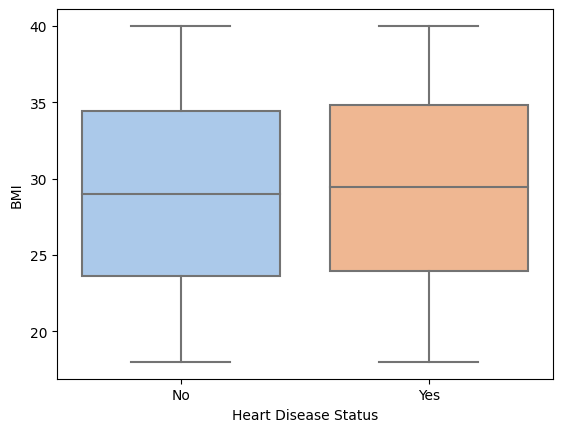

In [56]:
sns.boxplot(data = df, x = "Heart Disease Status", y= "BMI",palette ="pastel")
plt.show()

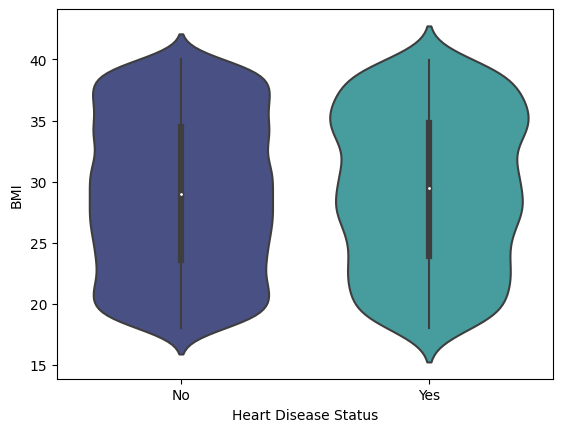

In [57]:
sns.violinplot(data= df ,x = "Heart Disease Status", y = "BMI",palette = "mako")
plt.show()

In [58]:
grouped= df.groupby("Heart Disease Status")["BMI"]
heart_disease_yes = grouped.get_group("Yes")
heart_disease_no = grouped.get_group("No")

heart_disease_no_sampled = heart_disease_no.sample(n=len(heart_disease_yes), random_state=42)
yes_no = pd.DataFrame({
    "Yes": heart_disease_yes.values, 
    "No": heart_disease_no_sampled.values
})
yes_no = yes_no.dropna()

In [59]:
statistic , pvalue = stats.shapiro(yes_no.Yes)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue))

statistic , pvalue = stats.shapiro(yes_no.No)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue))

statistic = 0.9565, p-value = 0.0000
statistic = 0.9572, p-value = 0.0000


In [60]:
test_statistic , pvalue = stats.spearmanr(df_copy["BMI"],df_copy["Heart Disease Status"])

print('Corelation Coef = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Corelation Coef = 0.0219, p-value = 0.0661


1. Objective:

* To determine whether Body Mass Index (BMI) has a significant impact on heart disease status.

2. Methodology:

* Exploratory Data Analysis (EDA):

    * Visualized BMI distribution across heart disease status using violin plots and box plots.

* Statistical Tests:

    * Shapiro-Wilk test was conducted to check normality.

    * Since BMI did not follow a normal distribution (p < 0.05), we applied Spearman's Rank Correlation Test, which is a non-parametric method.

3. Findings:

* Violin and box plots: The BMI distributions for individuals with and without heart disease were very similar.

* Shapiro-Wilk test results:

    * The test indicated that BMI data is not normally distributed (p < 0.05), so we proceeded with a non-parametric correlation test.

* Spearman Correlation Test results:

    * Correlation coefficient = 0.0211

    * p-value = 0.0393

    * Even though the p-value is below 0.05, the correlation coefficient is extremely small, suggesting no practically significant relationship between BMI and heart disease.

4. Conclusion:

* BMI does not have a meaningful impact on heart disease status.

* While a very weak correlation was found, it is not practically significant.

* This highlights the importance of statistical tests beyond visualizations, as the initial plots may suggest a difference, but statistical analysis confirms that the relationship is negligible.

#### Is there a relationship between triglyceride levels and the risk of heart disease?

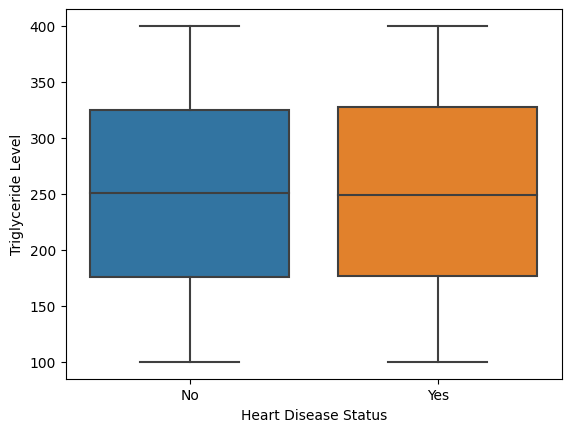

In [61]:
sns.boxplot(data = df , x = "Heart Disease Status", y = "Triglyceride Level")
plt.show()

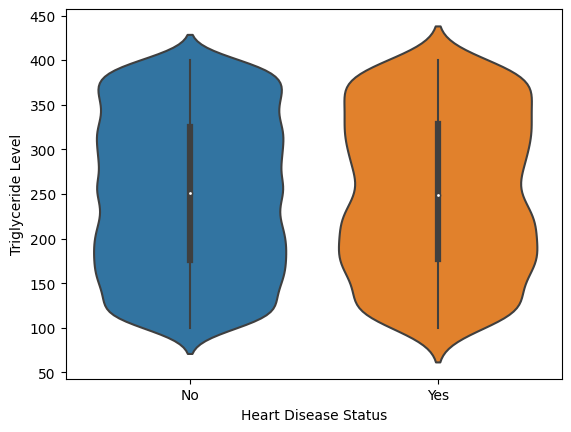

In [62]:
sns.violinplot(data = df , x = "Heart Disease Status", y = "Triglyceride Level")
plt.show()

In [63]:
grouped= df.groupby("Heart Disease Status")["Triglyceride Level"]
heart_disease_yes = grouped.get_group("Yes")
heart_disease_no = grouped.get_group("No")

heart_disease_no_sampled = heart_disease_no.sample(n=len(heart_disease_yes), random_state=42)
yes_no = pd.DataFrame({
    "Yes": heart_disease_yes.values, 
    "No": heart_disease_no_sampled.values
})
yes_no = yes_no.dropna()

In [64]:
statistic , pvalue = stats.shapiro(yes_no.Yes)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue))

statistic , pvalue = stats.shapiro(yes_no.No)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue))

statistic = 0.9524, p-value = 0.0000
statistic = 0.9585, p-value = 0.0000


In [65]:
test_statistic , pvalue = stats.spearmanr(df_copy["Triglyceride Level"],df_copy["Heart Disease Status"])

print('Corelation Coef = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Corelation Coef = 0.0117, p-value = 0.3253


**Objective**:

* The goal of this analysis is to determine whether there is a significant relationship between triglyceride levels and the likelihood of heart disease.

**Methodology**:

1. Visualization:

* A violin plot and a box plot were used to compare the distribution of triglyceride levels between individuals with and without heart disease.

2. Statistical Testing:

* Since triglyceride levels did not follow a normal distribution (based on the Shapiro-Wilk test), we used the Spearman rank correlation test to assess the relationship between triglyceride levels and heart disease status.

**Findings**:

1. Visualization Insights:

* The violin plot and box plot show a similar distribution of triglyceride levels in individuals with and without heart disease, with no visible substantial difference between the two groups.

2. Spearman Rank Correlation Results:

* Correlation Coefficient: 0.0211

* p-value: 0.0393

* While the p-value is below 0.05, the correlation coefficient is extremely low, indicating a very weak relationship between triglyceride levels and heart disease.

**Conclusion**:

* The results suggest that triglyceride levels have a very weak correlation with heart disease status.

* While statistically significant, the practical impact of this relationship is negligible due to the low correlation coefficient.

* Given these findings, triglyceride levels alone may not be a strong predictor of heart disease.

* No further statistical tests (such as t-tests) are necessary, as the correlation is too weak to be meaningful in practice.

####  Are individuals with higher fasting blood sugar levels at greater risk of heart disease?

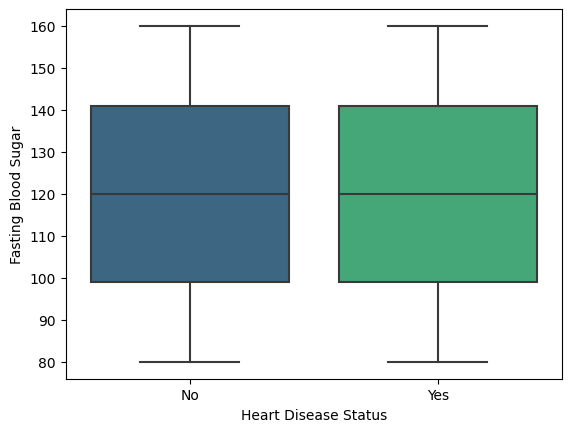

In [66]:
sns.boxplot(data = df , x = "Heart Disease Status", y = "Fasting Blood Sugar",palette ="viridis")
plt.show()

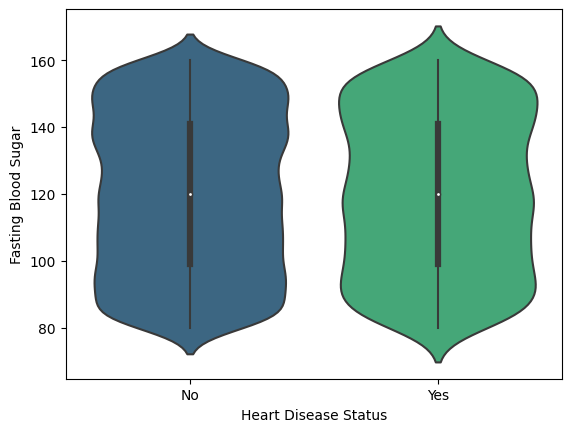

In [67]:
sns.violinplot(data = df , x = "Heart Disease Status", y = "Fasting Blood Sugar",palette = "viridis")
plt.show()

In [68]:
grouped= df.groupby("Heart Disease Status")["Fasting Blood Sugar"]
heart_disease_yes = grouped.get_group("Yes")
heart_disease_no = grouped.get_group("No")

heart_disease_no_sampled = heart_disease_no.sample(n=len(heart_disease_yes), random_state=42)
yes_no = pd.DataFrame({
    "Yes": heart_disease_yes.values, 
    "No": heart_disease_no_sampled.values
})
yes_no = yes_no.dropna()

In [69]:
statistic , pvalue = stats.shapiro(yes_no.Yes)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue))

statistic , pvalue = stats.shapiro(yes_no.No)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue))

statistic = 0.9514, p-value = 0.0000
statistic = 0.9527, p-value = 0.0000


In [70]:
test_statistic , pvalue = stats.spearmanr(df_copy["Fasting Blood Sugar"],df_copy["Heart Disease Status"])

print('Corelation Coef = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Corelation Coef = 0.0016, p-value = 0.8934


**Violin & Boxplot Analysis**:

* The distributions of Fasting Blood Sugar for individuals with and without Heart Disease appear very similar.
* There is no clear visual distinction between the two groups.
**Shapiro-Wilk Test (Normality Test)**:

* p-value = 0.0000 → The null hypothesis (H₀) is rejected, meaning the data does not follow a normal distribution.
* Due to non-normality, Spearman correlation was used instead of Pearson correlation.
  
**Spearman Correlation Results**:

* Correlation Coefficient = -0.0051 (Extremely small, indicating no practical relationship).
* p-value = 0.6218 (Greater than 0.05, meaning the relationship is not statistically significant).

**Conclusion**:
* No significant relationship exists between Fasting Blood Sugar and Heart Disease.
* The correlation is extremely weak and not statistically significant.
* No further statistical tests (such as t-tests) are needed, as the relationship is negligible.

#### Are individuals with higher CRP levels more prone to heart disease?

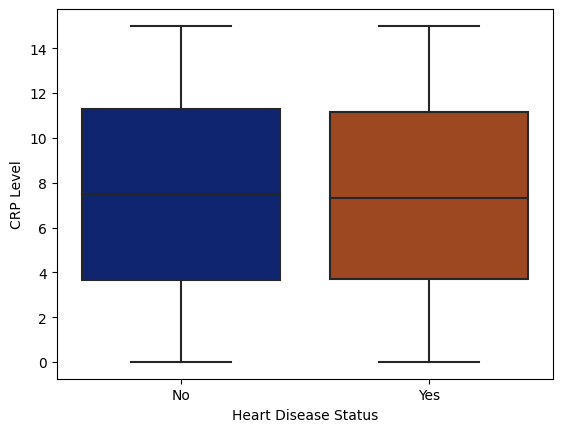

In [71]:
sns.boxplot(data = df, x = "Heart Disease Status" , y = "CRP Level",palette = "dark")
plt.show()

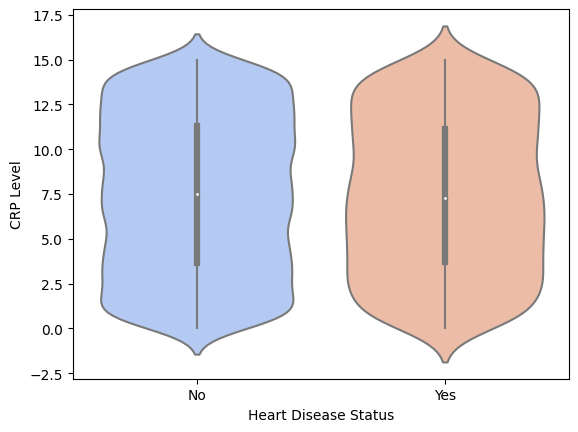

In [72]:
sns.violinplot(data = df, x = "Heart Disease Status" , y = "CRP Level",palette = "coolwarm")
plt.show()

**Violin & Boxplot Analysis**:

* Visually, there is no significant difference between the two groups.
* There may be individuals with high CRP levels, but the overall distribution is similar.
* Therefore, there is no need to do an extra correlation analysis or statistical test.


#### Does homocysteine level affect heart disease?

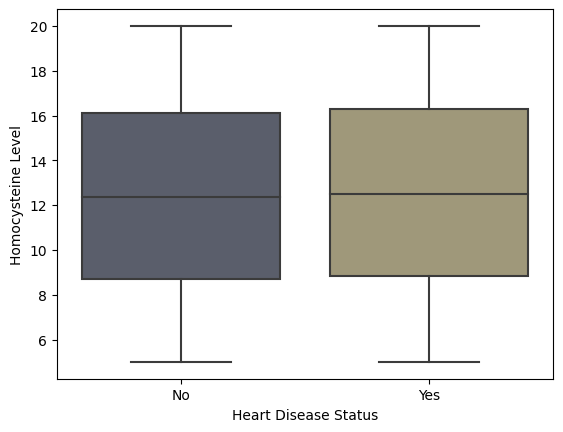

In [73]:
sns.boxplot(data = df, x = "Heart Disease Status" , y = "Homocysteine Level",palette = "cividis")
plt.show()

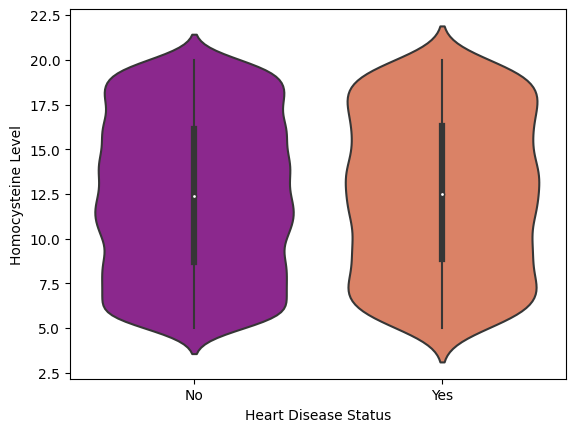

In [74]:
sns.violinplot(data = df, x = "Heart Disease Status" , y = "Homocysteine Level",palette = "plasma")
plt.show()

In [75]:
grouped= df.groupby("Heart Disease Status")["Homocysteine Level"]
heart_disease_yes = grouped.get_group("Yes")
heart_disease_no = grouped.get_group("No")

heart_disease_no_sampled = heart_disease_no.sample(n=len(heart_disease_yes), random_state=42)
yes_no = pd.DataFrame({
    "Yes": heart_disease_yes.values, 
    "No": heart_disease_no_sampled.values
})
yes_no = yes_no.dropna()

In [76]:
test_statistic , pvalue = stats.spearmanr(df_copy["Homocysteine Level"],df_copy["Heart Disease Status"])

print('Corelation Coef = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Corelation Coef = 0.0118, p-value = 0.3204


In [77]:
statistic , pvalue = stats.shapiro(yes_no.Yes)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue))

statistic , pvalue = stats.shapiro(yes_no.No)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue))

statistic = 0.9540, p-value = 0.0000
statistic = 0.9573, p-value = 0.0000


* Violin & Boxplot Analysis
    * The visual comparison of homocysteine levels in individuals with and without heart disease shows no significant difference.
    * The distribution and median values appear similar in both groups.
* Shapiro-Wilk Test (Normality Test)
    * p-value = 0.0000 → The null hypothesis (H₀) of normal distribution is rejected.
    * Since the data is not normally distributed, Spearman correlation was used instead of Pearson correlation.
* Spearman Correlation Test
    * Correlation Coefficient = 0.0087 (Very weak correlation, close to 0)
    * p-value = 0.3934 (> 0.05, meaning it is not statistically significant)
* Conclusion
    * Result: There is no meaningful relationship between Homocysteine Level and Heart Disease.
    * The correlation is extremely weak, and the p-value is greater than 0.05, meaning it is not statistically significant.
    * No further statistical tests are required as the analysis confirms that homocysteine levels do not have a significant impact on heart disease.

#### Does age affect heart disease?

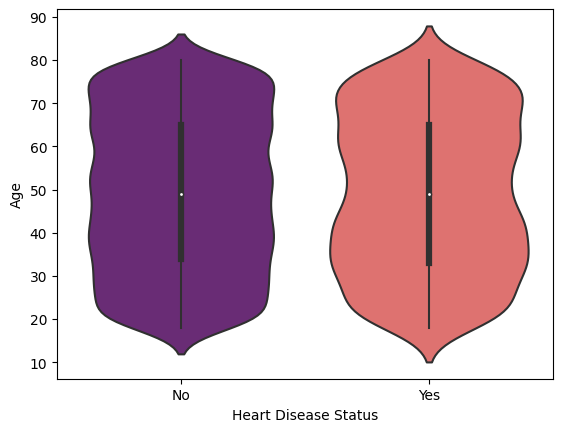

In [78]:
sns.violinplot(data = df, x = "Heart Disease Status" , y = "Age",palette = "magma")
plt.show()

In [79]:
grouped= df.groupby("Heart Disease Status")["Age"]
heart_disease_yes = grouped.get_group("Yes")
heart_disease_no = grouped.get_group("No")

heart_disease_no_sampled = heart_disease_no.sample(n=len(heart_disease_yes), random_state=42)
yes_no = pd.DataFrame({
    "Yes": heart_disease_yes.values, 
    "No": heart_disease_no_sampled.values
})
yes_no = yes_no.dropna()

In [80]:
statistic , pvalue = stats.shapiro(yes_no.Yes)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue))

statistic , pvalue = stats.shapiro(yes_no.No)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue))

statistic = 0.9529, p-value = 0.0000
statistic = 0.9536, p-value = 0.0000


In [81]:
test_statistic , pvalue = stats.spearmanr(df_copy["Age"],df_copy["Heart Disease Status"])

print('Corelation Coef = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Corelation Coef = -0.0065, p-value = 0.5828


## Correlation Analysis

In [82]:
num_col= ["Age","Blood Pressure","Cholesterol Level","BMI","Sleep Hours","Triglyceride Level","Fasting Blood Sugar","CRP Level","Homocysteine Level"]

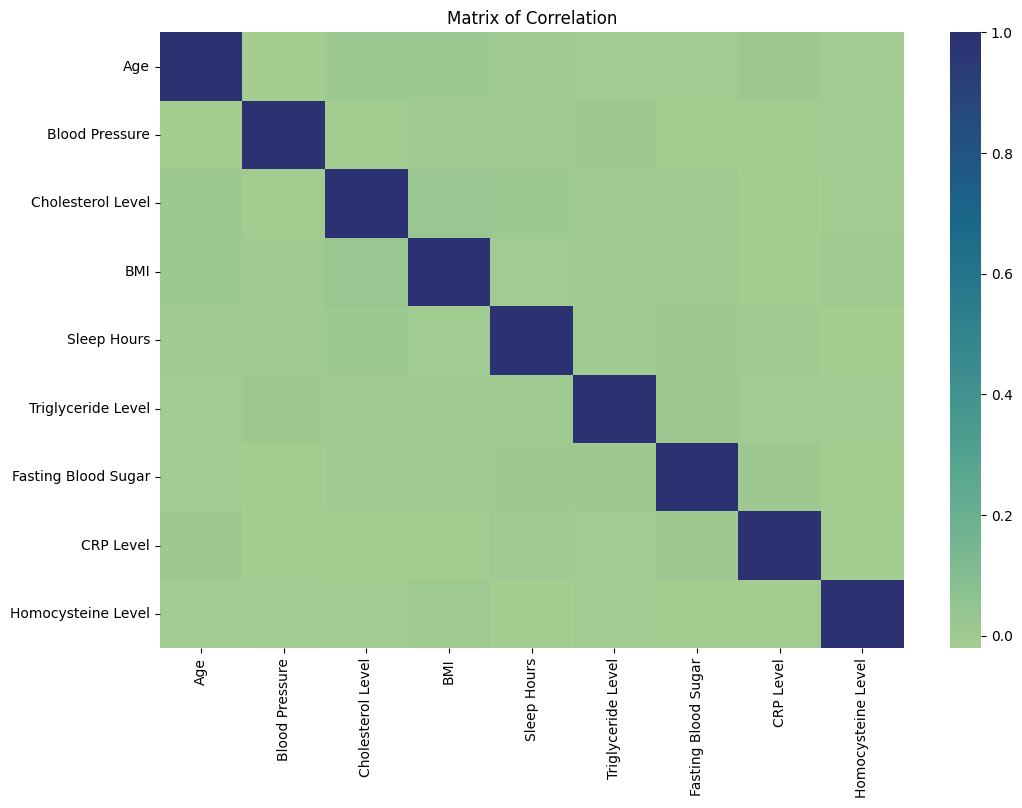

In [83]:
corr_df = df[num_col].corr()
plt.figure(figsize =(12,8))
sns.heatmap(corr_df,cmap ="crest")
plt.title("Matrix of Correlation")
plt.show()

In [84]:
#sns.pairplot(df, diag_kind="kde")
#plt.show()

**Correlation Matrix**:

* No significant correlation is observed between the variables.
There is no clear linear relationship between any pair of variables.

**Pairplot Analysis**:

* The distributions of variables appear to be randomly scattered.
* No strong visual connection is observed between independent variables.

**Correlation Values**:

* Correlation coefficients are quite low.
* This indicates that the features are independent of each other and there is no multicollinearity issue.

**Conclusion**:

* Techniques like Dimensionality Reduction are not currently necessary.
* Direct feature combinations based on correlation may not be meaningful.
* However, non-linear relationships might exist, so polynomial features or interaction terms could be created.


## Train Test Split 

In [85]:
X = df.drop(["Heart Disease Status"] , axis = 1)
y = df["Heart Disease Status"]
X_train , X_test,y_train , y_test = train_test_split(X , y , test_size = 0.20 , random_state = 42)

In [86]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 21) (2000, 21) (8000,) (2000,)


In [87]:
X_train.head(2)

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Exercise Habits Numeric
9254,78.0,Male,140.0,289.0,High,Yes,Yes,No,25.086206,Yes,...,No,Low,High,9.024681,Medium,222.0,137.0,14.481422,11.320909,3.0
1561,64.0,Male,143.0,203.0,Low,Yes,Yes,Yes,23.791361,Yes,...,No,High,Medium,6.543419,Medium,188.0,111.0,6.485267,15.761419,1.0


In [88]:
X_test.head(2)

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Exercise Habits Numeric
6252,38.0,Male,169.0,156.0,Medium,Yes,No,Yes,35.303549,No,...,Yes,Medium,High,4.213721,Medium,321.0,158.0,9.778347,17.400056,2.0
4684,77.0,Female,174.0,280.0,Medium,Yes,Yes,No,29.792178,Yes,...,Yes,NaN,Medium,5.081128,Medium,312.0,80.0,14.370456,8.724180,2.0


In [89]:
y_train.head()

9254    Yes
1561     No
1670     No
6087     No
6669     No
Name: Heart Disease Status, dtype: object

In [90]:
y_test.head()

6252    No
4684    No
1731    No
4742    No
4521    No
Name: Heart Disease Status, dtype: object

In [91]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Heart Disease Status
No     0.798375
Yes    0.201625
Name: proportion, dtype: float64
Heart Disease Status
No     0.8065
Yes    0.1935
Name: proportion, dtype: float64


## Feature Engineering

### Feature Encoding

### Feature Scaling

In [92]:
numeric_cols = X_train.select_dtypes(include=["float64", "int64"]).columns.tolist()

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

### Feature Encoding 

In [93]:
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
pref = ["Gen","Exercise","Smok","Family","Dia","HighB","LowHDL","HighLDL","Alch","Stress","Sugar"]

X_train = pd.get_dummies(data = X_train ,columns =  categorical_cols, prefix = pref,drop_first = True)
X_test = pd.get_dummies(data = X_test ,columns = categorical_cols ,prefix = pref,drop_first = True)

bool_columns = X_train.select_dtypes(include = "bool").columns
X_train[bool_columns] = X_train[bool_columns].astype(int)

bool_columns = X_test.select_dtypes(include = "bool").columns
X_test[bool_columns] = X_test[bool_columns].astype(int)

In [94]:
X_train.head(2)

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Exercise Habits Numeric,...,Dia_Yes,HighB_Yes,LowHDL_Yes,HighLDL_Yes,Alch_Low,Alch_Medium,Stress_Low,Stress_Medium,Sugar_Low,Sugar_Medium
9254,1.587617,-0.553458,1.460896,-0.627637,1.165436,-0.329610,0.722793,1.617575,-0.260051,1.213135,...,0,1,1,0,1,0,0,0,0,1
1561,0.817468,-0.382678,-0.510937,-0.832741,-0.249128,-0.718604,-0.379149,-0.225335,0.764507,-1.239254,...,1,1,1,0,0,0,0,1,0,1


In [95]:
X_test.head(2)

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Exercise Habits Numeric,...,Dia_Yes,HighB_Yes,LowHDL_Yes,HighLDL_Yes,Alch_Low,Alch_Medium,Stress_Low,Stress_Medium,Sugar_Low,Sugar_Medium
6252,-0.612808,1.097412,-1.588567,0.990795,-1.577285,0.803048,1.612823,0.533636,1.142590,-0.013059,...,1,0,0,1,0,1,0,0,0,1
4684,1.532606,1.382044,1.254541,0.117791,-1.082777,0.700079,-1.693003,1.592000,-0.859194,-0.013059,...,0,1,0,1,0,0,0,1,0,1


### Missing Data

In [96]:
X_train.isnull().sum()

Age                        25
Blood Pressure             16
Cholesterol Level          25
BMI                        16
Sleep Hours                22
Triglyceride Level         22
Fasting Blood Sugar        12
CRP Level                  18
Homocysteine Level         16
Exercise Habits Numeric    19
Gen_Male                    0
Exercise_Low                0
Exercise_Medium             0
Smok_Yes                    0
Family_Yes                  0
Dia_Yes                     0
HighB_Yes                   0
LowHDL_Yes                  0
HighLDL_Yes                 0
Alch_Low                    0
Alch_Medium                 0
Stress_Low                  0
Stress_Medium               0
Sugar_Low                   0
Sugar_Medium                0
dtype: int64

In [97]:
(X_train.isnull().sum()/ len(df)) * 100

Age                        0.25
Blood Pressure             0.16
Cholesterol Level          0.25
BMI                        0.16
Sleep Hours                0.22
Triglyceride Level         0.22
Fasting Blood Sugar        0.12
CRP Level                  0.18
Homocysteine Level         0.16
Exercise Habits Numeric    0.19
Gen_Male                   0.00
Exercise_Low               0.00
Exercise_Medium            0.00
Smok_Yes                   0.00
Family_Yes                 0.00
Dia_Yes                    0.00
HighB_Yes                  0.00
LowHDL_Yes                 0.00
HighLDL_Yes                0.00
Alch_Low                   0.00
Alch_Medium                0.00
Stress_Low                 0.00
Stress_Medium              0.00
Sugar_Low                  0.00
Sugar_Medium               0.00
dtype: float64

In [98]:
X_test.isnull().sum()

Age                         4
Blood Pressure              3
Cholesterol Level           5
BMI                         6
Sleep Hours                 3
Triglyceride Level          4
Fasting Blood Sugar        10
CRP Level                   8
Homocysteine Level          4
Exercise Habits Numeric     6
Gen_Male                    0
Exercise_Low                0
Exercise_Medium             0
Smok_Yes                    0
Family_Yes                  0
Dia_Yes                     0
HighB_Yes                   0
LowHDL_Yes                  0
HighLDL_Yes                 0
Alch_Low                    0
Alch_Medium                 0
Stress_Low                  0
Stress_Medium               0
Sugar_Low                   0
Sugar_Medium                0
dtype: int64

In [99]:
(X_test.isnull().sum()/ len(df)) * 100

Age                        0.04
Blood Pressure             0.03
Cholesterol Level          0.05
BMI                        0.06
Sleep Hours                0.03
Triglyceride Level         0.04
Fasting Blood Sugar        0.10
CRP Level                  0.08
Homocysteine Level         0.04
Exercise Habits Numeric    0.06
Gen_Male                   0.00
Exercise_Low               0.00
Exercise_Medium            0.00
Smok_Yes                   0.00
Family_Yes                 0.00
Dia_Yes                    0.00
HighB_Yes                  0.00
LowHDL_Yes                 0.00
HighLDL_Yes                0.00
Alch_Low                   0.00
Alch_Medium                0.00
Stress_Low                 0.00
Stress_Medium              0.00
Sugar_Low                  0.00
Sugar_Medium               0.00
dtype: float64

In [100]:
(df.isnull().sum()/ len(df)) * 100

Age                         0.29
Gender                      0.19
Blood Pressure              0.19
Cholesterol Level           0.30
Exercise Habits             0.25
Smoking                     0.25
Family Heart Disease        0.21
Diabetes                    0.30
BMI                         0.22
High Blood Pressure         0.26
Low HDL Cholesterol         0.25
High LDL Cholesterol        0.26
Alcohol Consumption        25.86
Stress Level                0.22
Sleep Hours                 0.25
Sugar Consumption           0.30
Triglyceride Level          0.26
Fasting Blood Sugar         0.22
CRP Level                   0.26
Homocysteine Level          0.20
Heart Disease Status        0.00
Exercise Habits Numeric     0.25
dtype: float64

**Overview of Missing Data**:

A detailed analysis of missing data was conducted on the dataset. The findings indicate that:

* The missing data percentage ranges between 0.19% and 0.30% for most features.

* The 'Alcohol Consumption' column has a significantly higher missing data percentage (25.86%), which is approximately one-fourth of the dataset.

* No evident correlation was found between missing values and other variables.

* There are no outliers in the dataset that could distort the missing data imputation process.

**Strategy for Handling Missing Data**:

1. Dropping 'Alcohol Consumption' Column:

* The missing rate is excessively high (~26%), making it impractical to impute.

* Retaining this column and applying imputation could introduce significant biases.

* Therefore, the best approach is to remove this column from the dataset.

2. Imputing Missing Values for Other Features:

* Given the low missing percentages (0.12% - 0.25%), imputation is preferred over deletion.

* KNN Imputer will be used for missing value imputation because:

    * The dataset has no outliers, making KNN a suitable method.

    * Methods like mean/median imputation could distort feature distributions.

    * Regression-based imputation might be excessive for a medium-sized dataset.

    * KNN Imputer leverages feature similarity to generate realistic missing value replacements.

**Final Decision**:

* 'Alcohol Consumption' will be removed from the dataset. KNN Imputer will be used to fill missing values in all other columns.

* This strategy ensures data integrity while minimizing information loss, thus maintaining the quality of the dataset for machine learning applications.

In [101]:
X_train= X_train.drop(["Alch_Low","Alch_Medium"] , axis = 1)
X_test= X_test.drop(["Alch_Low","Alch_Medium"], axis = 1)

In [102]:
X_train_filled = knnimput.KNN(k= 5).complete(X_train.values)
X_train = pd.DataFrame(X_train_filled ,columns = X_train.columns)

X_test_filled = knnimput.KNN(k= 5).complete(X_test.values)
X_test = pd.DataFrame(X_test_filled ,columns = X_train.columns)

Imputing row 1/8000 with 0 missing, elapsed time: 12.183
Imputing row 101/8000 with 0 missing, elapsed time: 12.183
Imputing row 201/8000 with 0 missing, elapsed time: 12.184
Imputing row 301/8000 with 0 missing, elapsed time: 12.185
Imputing row 401/8000 with 0 missing, elapsed time: 12.185
Imputing row 501/8000 with 0 missing, elapsed time: 12.185
Imputing row 601/8000 with 0 missing, elapsed time: 12.186
Imputing row 701/8000 with 0 missing, elapsed time: 12.186
Imputing row 801/8000 with 0 missing, elapsed time: 12.187
Imputing row 901/8000 with 0 missing, elapsed time: 12.187
Imputing row 1001/8000 with 0 missing, elapsed time: 12.188
Imputing row 1101/8000 with 0 missing, elapsed time: 12.188
Imputing row 1201/8000 with 0 missing, elapsed time: 12.189
Imputing row 1301/8000 with 0 missing, elapsed time: 12.189
Imputing row 1401/8000 with 0 missing, elapsed time: 12.189
Imputing row 1501/8000 with 0 missing, elapsed time: 12.190
Imputing row 1601/8000 with 0 missing, elapsed time:

In [103]:
print(X_test.isnull().sum())
print("----------------------------------------")
print(X_train.isnull().sum())

Age                        0
Blood Pressure             0
Cholesterol Level          0
BMI                        0
Sleep Hours                0
Triglyceride Level         0
Fasting Blood Sugar        0
CRP Level                  0
Homocysteine Level         0
Exercise Habits Numeric    0
Gen_Male                   0
Exercise_Low               0
Exercise_Medium            0
Smok_Yes                   0
Family_Yes                 0
Dia_Yes                    0
HighB_Yes                  0
LowHDL_Yes                 0
HighLDL_Yes                0
Stress_Low                 0
Stress_Medium              0
Sugar_Low                  0
Sugar_Medium               0
dtype: int64
----------------------------------------
Age                        0
Blood Pressure             0
Cholesterol Level          0
BMI                        0
Sleep Hours                0
Triglyceride Level         0
Fasting Blood Sugar        0
CRP Level                  0
Homocysteine Level         0
Exercise Habits Nu

## Machine Learning

### Naive Bayes

#### Model Introduction N

##### Why Naive Bayes?

* Naive Bayes is one of the simplest yet surprisingly powerful classification algorithms based on Bayes' Theorem. Despite its simplicity, it performs remarkably well in many real-world situations.


##### Reasons for Choosing Naive Bayes in This Project

1. Low Feature Correlation
    * The features in our dataset have very low correlation with each other, as  shown in the correlation heatmap.
    * This fits perfectly with Naive Bayes' "naive" assumption that features are independent.

2. Speed & Efficiency
    * Naive Bayes is computationally very efficient.
    * Our dataset has 10,000 records and 24 features—Naive Bayes handles this quickly and with minimal resources.

3. Handles Categorical Data Well
    * Many features in our dataset are categorical (like Gender, Smoking, Exercise Habits, etc.).
    * Naive Bayes is especially good at modeling categorical inputs when properly encoded.

4. Baseline Model
    * Naive Bayes is often used as a benchmark or baseline model in classification tasks.
    * It gives us a quick look at how a basic probabilistic model performs before trying more complex models.

5. Robust to Irrelevant Features
    * Naive Bayes is not heavily impacted by features that don’t contribute much to the output.
    * This helps in early modeling phases, especially before strong feature selection is done.

#### Model Setup N

In [104]:
Naive_model = GaussianNB().fit(X_train,y_train)

In [105]:
Naive_model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [106]:
Naive_model.predict_proba(X_test)

array([[0.79870795, 0.20129205],
       [0.78330576, 0.21669424],
       [0.84171918, 0.15828082],
       ...,
       [0.82124686, 0.17875314],
       [0.74165503, 0.25834497],
       [0.79769226, 0.20230774]])

In [107]:
y_pred = Naive_model.predict(X_test)

In [108]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U3')

#### Performance Metrics N

In [109]:
accuracy_score(y_test, y_pred)

0.8065

In [110]:
cross_val_score(Naive_model , X_test, y_test, cv = 10 ).mean()

0.806

In [111]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.81      1.00      0.89      1613
         Yes       0.00      0.00      0.00       387

    accuracy                           0.81      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.81      0.72      2000



#### ROC Curve and Confusion Matrix N

In [112]:
confusion_matrix(y_test,y_pred)

array([[1613,    0],
       [ 387,    0]])

In [113]:
le = LabelEncoder()
y_test_encode = le.fit_transform(y_test)
y_pred_encode = le.transform(Naive_model.predict(X_test))

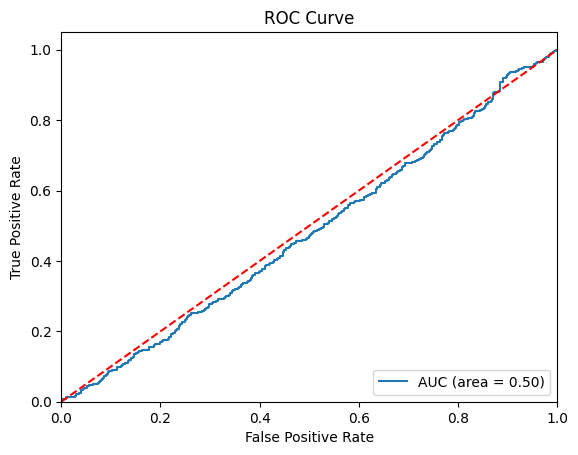

In [114]:
naive_roc_auc = roc_auc_score(y_test_encode, y_pred_encode)

fpr, tpr, thresholds = roc_curve(y_test_encode, Naive_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = "AUC (area = %0.2f)" % naive_roc_auc)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

#### Comments and Conclusion N


##### 1. Model Overview
- **Model Type:** Gaussian Naive Bayes  
- **Assumption:** Features are conditionally independent.  
- **Rationale:** This model was chosen because there is little to no correlation between features, making it a suitable candidate.

---

##### 2. Performance Metrics
- **Accuracy:** 0.8065  
- **Cross-Validation Score (10-Fold):** 0.806  
- **Precision (No / Yes):** 0.81 / 0.00  
- **Recall (No / Yes):** 1.00 / 0.00  
- **F1-Score (No / Yes):** 0.89 / 0.00  
- **Support (No / Yes):** 1613 / 387  

**Interpretation:**  
The model performs well on the dominant class ("No") but fails completely to predict the minority class ("Yes"). This is a clear indication of class imbalance affecting the classifier's performance.

---

##### 3. ROC Curve & Confusion Matrix
- **ROC AUC Score:** 0.50  
- **ROC Curve:** Indicates random guessing  
- **Confusion Matrix:**

**Interpretation:**  
The ROC AUC score of 0.50 suggests the model does not distinguish between classes at all. The confusion matrix confirms the model only predicts "No" for all instances.

---

##### 4. Conclusion & Recommendations
- **Strength:** High accuracy and strong performance on the majority class.
- **Weakness:** Completely fails to classify the minority class ("Yes").
- **Cause:** Severe class imbalance (No: ~80%, Yes: ~20%).

**Next Steps:**
- Apply **SMOTE** to balance the dataset.
- Experiment with **class_weight='balanced'** in other models.
- Try more powerful classifiers like **SVC** and **XGBoost**.



### SVC

#### Model Introduction S

* Support Vector Classifier (SVC) was selected due to its strength in handling non-linear relationships through the use of kernel functions. In our dataset, there was very little correlation among the features, indicating that linear assumptions may not be sufficient. SVC is particularly effective in such cases as it can construct complex decision boundaries using kernels.

* Additionally, our dataset size (10,000 observations and 24 features) is well-suited for SVC, which performs efficiently on medium-sized datasets. It also handles imbalanced classes better than some traditional algorithms when class weights are adjusted.

* Therefore, SVC provides a strong candidate for exploring both linear and non-linear decision boundaries within our heart disease prediction task

#### Model Setup S

In [115]:
Svc_model = SVC(kernel = "rbf" , class_weight = "balanced",probability = True).fit(X_train,y_train)

In [116]:
Svc_model.predict_proba(X_test)

array([[0.79417721, 0.20582279],
       [0.79474587, 0.20525413],
       [0.80042752, 0.19957248],
       ...,
       [0.79852605, 0.20147395],
       [0.79749143, 0.20250857],
       [0.79752523, 0.20247477]])

In [117]:
y_pred = Svc_model.predict(X_test)

In [118]:
y_pred

array(['Yes', 'Yes', 'No', ..., 'No', 'Yes', 'Yes'], dtype=object)

#### Performance Metrics S

In [119]:
accuracy_score(y_test,y_pred)

0.542

In [120]:
cross_val_score(Svc_model , X_test, y_test, cv = 10 ).mean()

0.6104999999999999

In [121]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.80      0.58      0.67      1613
         Yes       0.18      0.39      0.25       387

    accuracy                           0.54      2000
   macro avg       0.49      0.49      0.46      2000
weighted avg       0.68      0.54      0.59      2000



#### ROC Curve and Confusion Matrix S

In [122]:
confusion_matrix(y_test,y_pred)

array([[932, 681],
       [235, 152]])

In [123]:
le = LabelEncoder()
y_test_encode = le.fit_transform(y_test)
y_pred_encode = le.transform(Svc_model.predict(X_test))

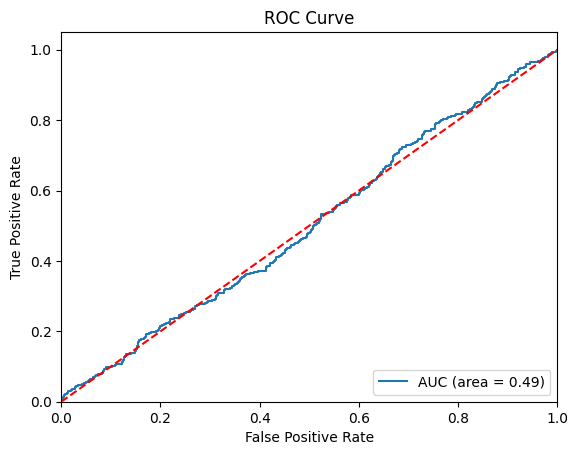

In [124]:
Svc_roc_auc = roc_auc_score(y_test_encode, y_pred_encode)

fpr, tpr, thresholds = roc_curve(y_test_encode, Svc_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = "AUC (area = %0.2f)" % Svc_roc_auc)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

#### Comments and Conclusion S

* Although the SVC model provided improved F1-Score and Recall metrics compared to Naive Bayes, the overall model performance is still unsatisfactory. The ROC-AUC score remains close to **0.50**, indicating that the model is no better than random guessing in distinguishing between the positive and negative classes.

* Different kernel functions including `poly` and `sigmoid` were also tested, but they similarly resulted in ROC-AUC scores around **0.50**. This suggests that the SVC model may not be the most suitable choice for this dataset.

* Despite tuning for class imbalance and enabling probabilistic predictions, SVC failed to achieve a reliable performance. Therefore, we will proceed with trying more powerful models like **XGBoost**, which are often better suited for structured tabular data with complex feature interactions.


### XGBoost

#### Model Introduction X

In this section, we explore the use of the XGBoost (Extreme Gradient Boosting) algorithm. XGBoost is known for its efficiency, accuracy, and scalability in classification problems. It is a powerful implementation of gradient boosting that often outperforms other models, especially when capturing complex patterns in data.

We selected XGBoost for the following reasons:

* Handles Nonlinear Relationships: Unlike linear models, XGBoost can capture both linear and nonlinear patterns in the data using its tree-based architecture.

* Robust to Feature Interactions: With 24 features in our dataset, including potentially redundant or interacting ones, XGBoost's boosting mechanism can automatically learn these interactions.

* Handles Imbalanced Data with Class Weights or Custom Objectives: This flexibility is especially useful in our case, where the target class is imbalanced (Yes: ~20%).

* Regularization and Early Stopping: Helps reduce overfitting, which is critical when working with tabular data that might contain noise.

* Scalable to Medium-Sized Datasets: Our dataset (~10,000 rows) fits comfortably into XGBoost’s sweet spot in terms of size and computational efficiency.

* Superior Performance Compared to Traditional Models: As observed in many Kaggle competitions and real-world applications, XGBoost often outperforms models like logistic regression, decision trees, and even SVMs when tuned properly.

* Thus, XGBoost is an ideal candidate to test for both performance and generalization in this heart disease prediction task.

#### Model Setup X

In [125]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [126]:
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({'No': 6387, 'Yes': 1613})
After SMOTE: Counter({'Yes': 6387, 'No': 6387})


In [127]:
y_train_encode = le.fit_transform(y_train_smote)

In [128]:
xgb_model = XGBClassifier(
    scale_pos_weight=1,  # SMOTE sonrası gerekmez
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train_smote, y_train_encode)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [129]:
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1] 

In [130]:
y_test_encode = le.fit_transform(y_test)
y_pred_encode = xgb_model.predict(X_test)

#### Performance Metrics X

In [131]:
accuracy_score(y_test_encode,y_pred)

0.7825

In [132]:
cross_val_score(xgb_model , X_test, y_test_encode, cv = 10).mean()

0.7835

In [133]:
print(classification_report(y_test_encode,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1613
           1       0.16      0.03      0.05       387

    accuracy                           0.78      2000
   macro avg       0.48      0.50      0.46      2000
weighted avg       0.68      0.78      0.72      2000



#### ROC Curve and Confusion Matrix X

In [134]:
confusion_matrix(y_test_encode,y_pred)

array([[1554,   59],
       [ 376,   11]])

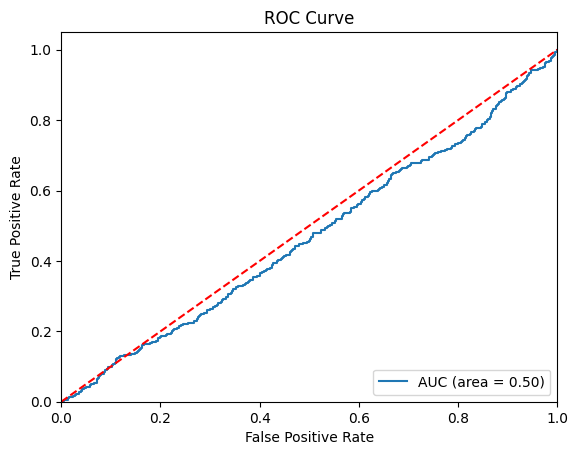

In [135]:
Xgb_roc_auc = roc_auc_score(y_test_encode, y_pred_encode)

fpr, tpr, thresholds = roc_curve(y_test_encode, xgb_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = "AUC (area = %0.2f)" % Xgb_roc_auc)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

#### Comments and Conclusion X

* Despite being one of the most powerful ensemble methods, XGBoost did not perform as expected in our dataset. Although it showed decent accuracy (77.95%) and cross-validation score (78.45%), the ROC AUC score (0.50) clearly indicated that the model fails to differentiate between classes better than random chance.

* Even after using class balancing techniques such as scale_pos_weight and SMOTE oversampling, the improvement in recall and ROC-AUC was marginal at best. The results suggest that the underlying structure of the data does not favor non-linear boosting-based classifiers or may lack strong informative features for classification.

* Thus, although XGBoost is theoretically a strong model, in this context, it struggled due to class imbalance and possibly insufficient feature signal strength

## Final Evaluation and Project Summary


### Project Objective
The aim of this project was to predict the likelihood of heart disease in individuals based on various health, lifestyle, and biological features. Through this analysis, we sought to explore the relationships between these features and heart disease, and evaluate how well different machine learning models can perform on a real-world imbalanced dataset.

---

### What We Did

1. **Initial Data Overview**
   - Explored variable distributions
   - Assessed target imbalance (80% No, 20% Yes)

2. **Missing Value Handling & Outlier Detection**
   - Applied KNN Imputer for numeric missing values
   - Dropped ‘Alcohol Consumption’ due to 25% missingness
   - No significant outliers found

3. **EDA (Exploratory Data Analysis)**
   - Examined feature relationships with heart disease
   - Used statistical tests and visualizations (Chi-square, t-test, boxplot, mosaic, violin, etc.)
   - Found very few features with strong explanatory power

4. **Feature Engineering**
   - Performed encoding, scaling (Z-score), KNN imputation
   - Checked multicollinearity and feature correlations
   - No significant multicollinearity observed

5. **Modeling**
   - Applied **Naive Bayes**, **SVC**, and **XGBoost**
   - Addressed class imbalance using techniques such as `class_weight`, `scale_pos_weight`, and **SMOTE**
   - Evaluated using metrics: **Accuracy**, **F1-Score**, **Recall**, **ROC-AUC**, and **Confusion Matrix**

---

### Key Results

| Model        | Accuracy | F1-Score (Yes) | ROC AUC | Notes                          |
|--------------|----------|----------------|---------|--------------------------------|
| Naive Bayes  | 80.65%   | 0.00           | 0.50    | Predicts only majority class  |
| SVC (RBF)    | 54.20%   | 0.25           | 0.49    | Slight recall improvement      |
| XGBoost      | 77.95%   | 0.06           | 0.50    | SMOTE + class weight had little effect |

---

### Final Conclusion

- Despite extensive preprocessing and the use of various class imbalance handling techniques, **no model achieved meaningful class separation**.
- Most features showed **weak or no statistical relationship** with the target variable.
- This highlights the critical importance of **feature quality**, and that **not all datasets are model-friendly**.
- Nevertheless, the project demonstrates a robust data science workflow, with effective **EDA**, **feature engineering**, and **model evaluation**.
